In [2]:
%pip install pandas numpy scikit-learn

  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.2-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.7 MB 3.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.7 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.7 MB 3.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.7 MB 3.3 MB/s eta

In [1]:
print("hello")

hello


In [5]:
import pandas as pd

In [6]:
#load data
movie_files = pd.read_csv("data/movies.csv")
links_files = pd.read_csv("data/links.csv")
rating_files = pd.read_csv("data/ratings.csv")
tags_files = pd.read_csv("data/tags.csv")

In [7]:
movie_files.head()
links_files.head()
tags_files.head()
rating_files.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 540.5 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 621.9 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.1 MB 621.9 kB/s eta 0:00:12
   ----- ---------------------------------- 1.0/8.1 MB 643.2 kB/s eta 0:00:12
   ----- ---------------------------------- 1.0/8.1 MB 643.2 kB/s eta 0:00:12
   ------ --------------------------------- 1.3/8.1 MB 672.3 kB/s eta 0:00:11
   ------- -------------------------------- 1.6/8

In [9]:
print(rating_files.info())


<class 'pandas.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

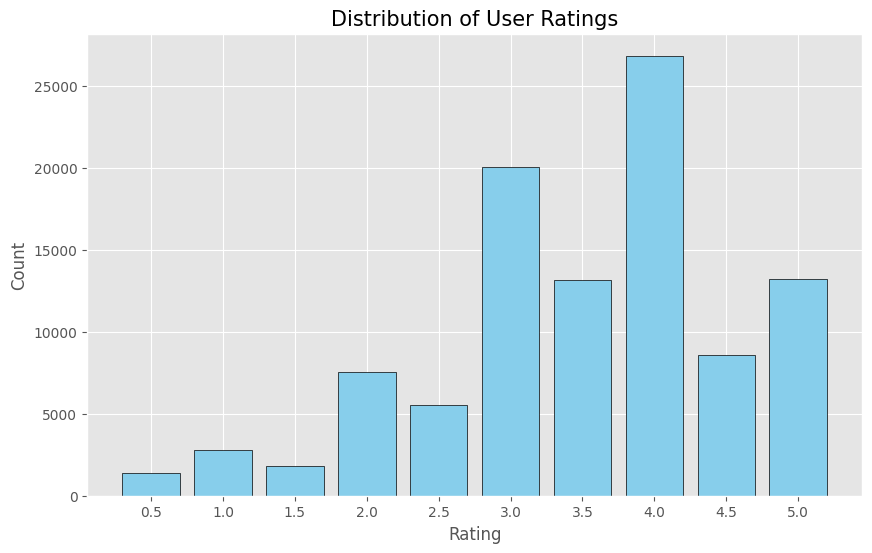

In [12]:
plt.figure(figsize=(10, 6))
rating_counts = rating_files['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, width=0.4, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rating_counts.index) # Ensure all rating ticks (0.5, 1.0, etc.) show
plt.savefig('rating_dist.png')
plt.show()

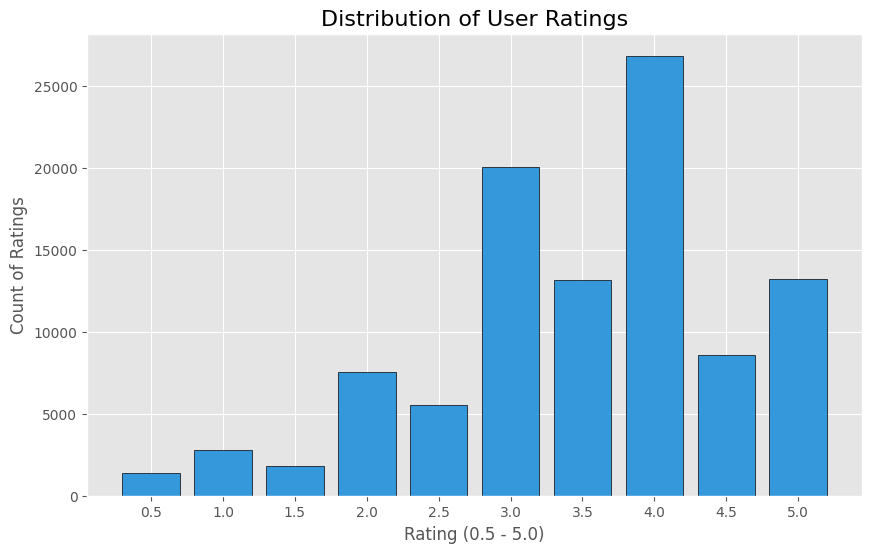

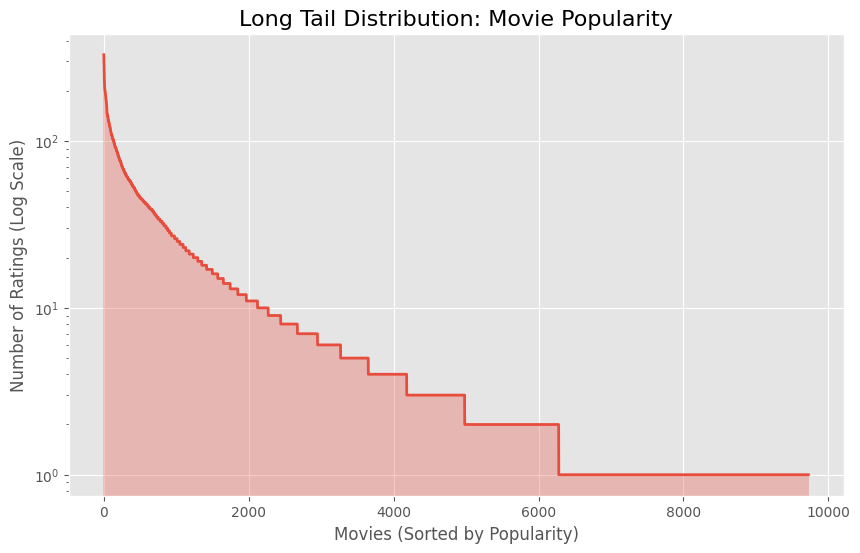

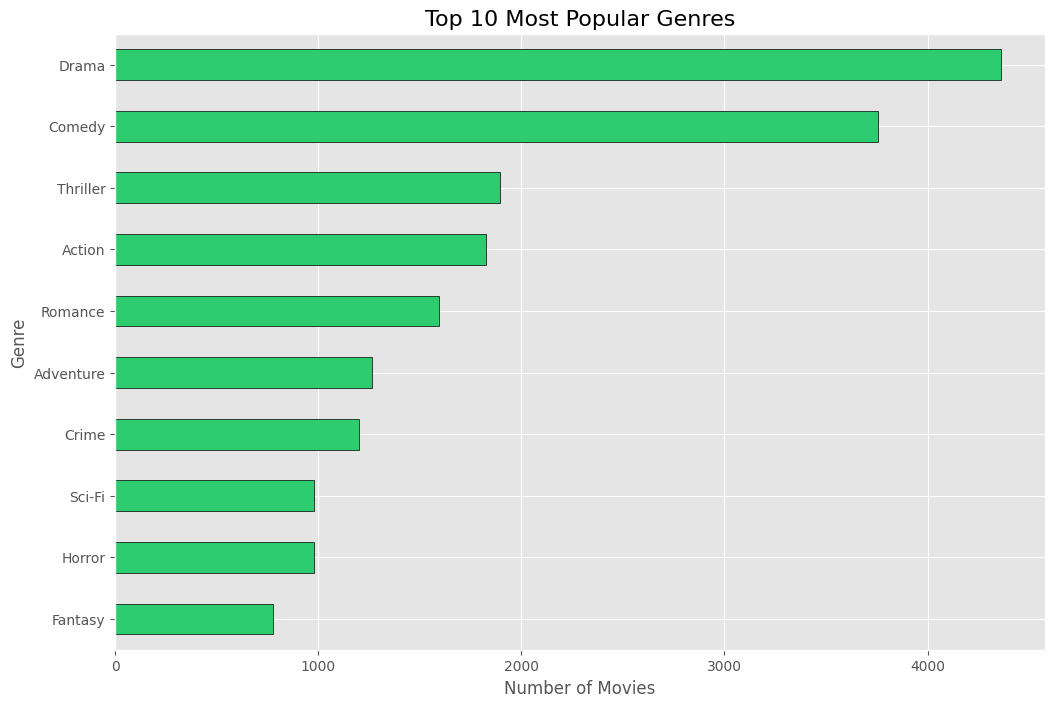

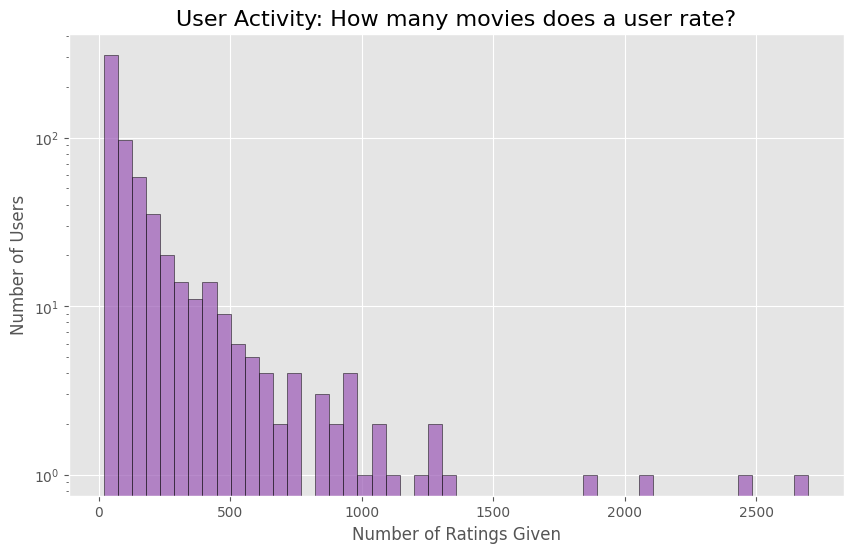

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Set a clean style for the plots
plt.style.use('ggplot')

# ==========================================
# 1. Distribution of Ratings
# ==========================================
# Insight: Shows if users are generous or critical
plt.figure(figsize=(10, 6))
rating_counts = rating_files['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, width=0.4, color='#3498db', edgecolor='black')

plt.title('Distribution of User Ratings', fontsize=16)
plt.xlabel('Rating (0.5 - 5.0)', fontsize=12)
plt.ylabel('Count of Ratings', fontsize=12)
plt.xticks(rating_counts.index)  # Show every rating step
plt.show()


# ==========================================
# 2. Long Tail Distribution (The "Why" for your project)
# ==========================================
# Insight: Shows that a few movies get all the love, and most get none (Popularity Bias)
plt.figure(figsize=(10, 6))
movie_popularity = rating_files.groupby('movieId').size().sort_values(ascending=False).values

plt.plot(range(len(movie_popularity)), movie_popularity, color='#e74c3c', linewidth=2)
plt.fill_between(range(len(movie_popularity)), movie_popularity, color='#e74c3c', alpha=0.3)

plt.title('Long Tail Distribution: Movie Popularity', fontsize=16)
plt.xlabel('Movies (Sorted by Popularity)', fontsize=12)
plt.ylabel('Number of Ratings (Log Scale)', fontsize=12)
plt.yscale('log')  # Log scale is ESSENTIAL here to see the tail
plt.show()


# ==========================================
# 3. Top 10 Genres
# ==========================================
# Insight: Shows which categories dominate the platform
plt.figure(figsize=(12, 8))

# Split "Action|Adventure" into individual rows -> Count them -> Take Top 10
genre_counts = movie_files['genres'].str.split('|').explode().value_counts().head(10)

# Sort for better visualization (Horizontal bars)
genre_counts.sort_values().plot(kind='barh', color='#2ecc71', edgecolor='black')

plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


# ==========================================
# 4. User Activity Histogram
# ==========================================
# Insight: Shows that most users rate very few items (Cold Start problem)
plt.figure(figsize=(10, 6))
user_activity = rating_files.groupby('userId').size()

plt.hist(user_activity, bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)

plt.title('User Activity: How many movies does a user rate?', fontsize=16)
plt.xlabel('Number of Ratings Given', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log') # Log scale to handle the "super users"
plt.show()

In [15]:
# Check rating statistics (Mean is approx 3.5)
print(rating_files['rating'].describe()) 

# Check distribution (Are users generous?)
print(rating_files['rating'].value_counts().sort_index())
# Insight: 4.0 is usually the most common rating.

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


In [16]:
from itertools import combinations

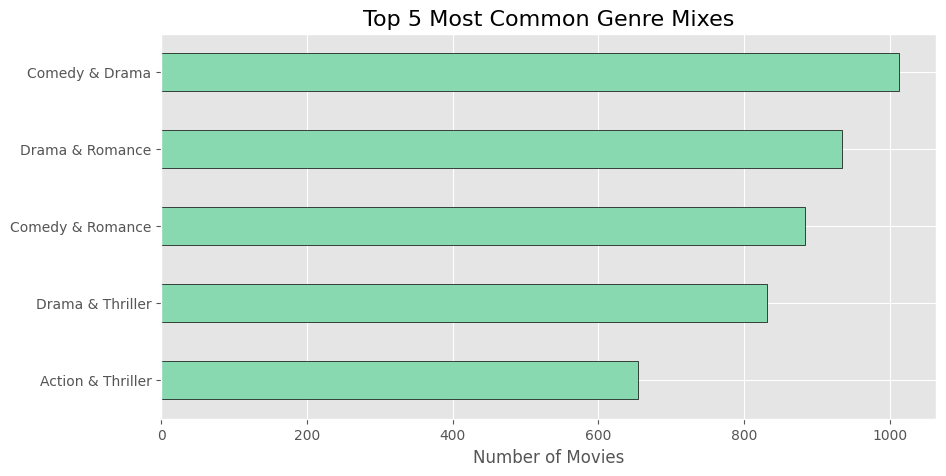

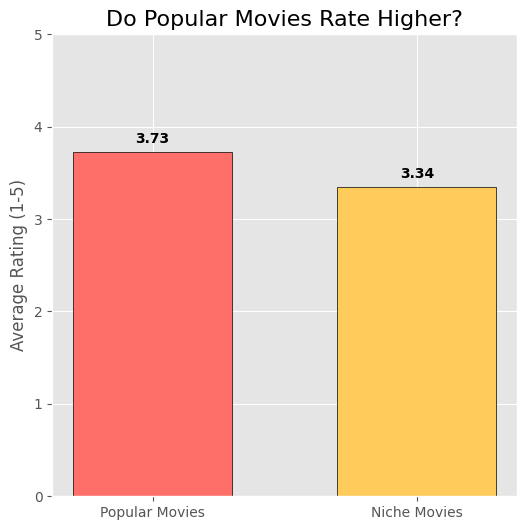

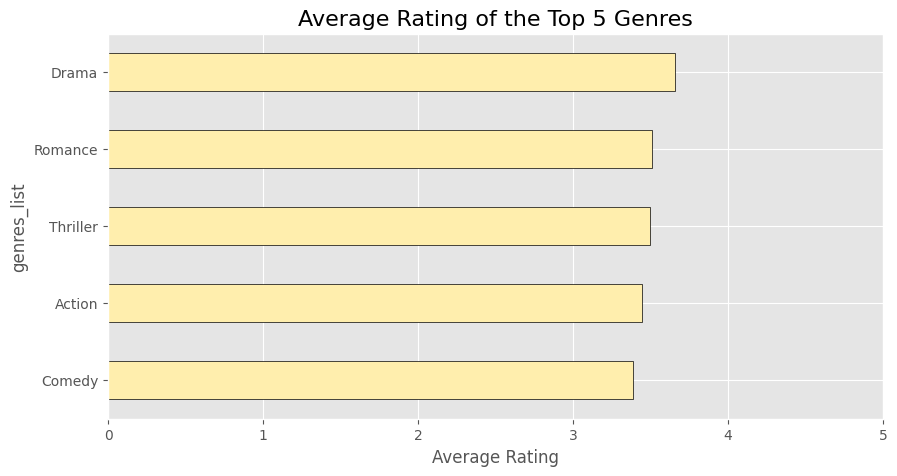

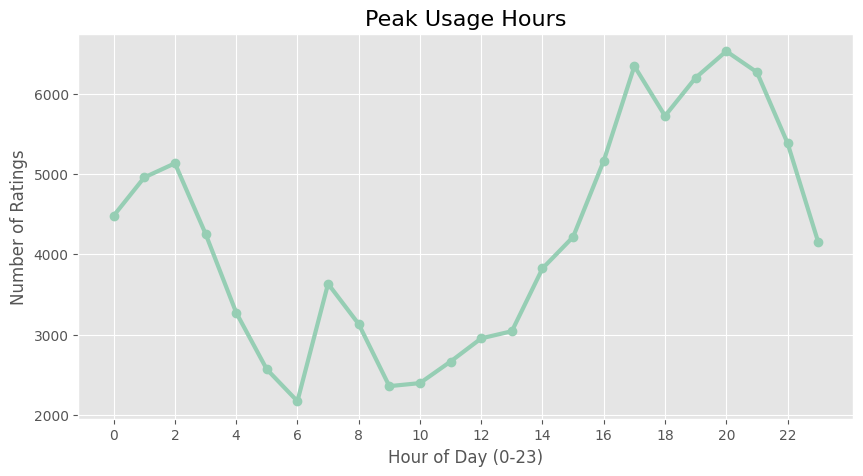

In [17]:
# ==========================================
# 1. Top 5 Genre Mixes (Simple Bar Chart)
# ==========================================
# Logic: Find pairs like "Comedy & Romance"
genre_pairs = []
movie_files['genres_list'] = movie_files['genres'].str.split('|')

for genres in movie_files['genres_list']:
    # Sort to treat (Action, Adventure) same as (Adventure, Action)
    valid_genres = sorted([g for g in genres if g != '(no genres listed)'])
    for pair in combinations(valid_genres, 2):
        genre_pairs.append(f"{pair[0]} & {pair[1]}")

# Count and Plot
pair_counts = pd.Series(genre_pairs).value_counts().head(5)

plt.figure(figsize=(10, 5))
pair_counts.sort_values().plot(kind='barh', color='#88d8b0', edgecolor='black')
plt.title('Top 5 Most Common Genre Mixes', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.show()


# ==========================================
# 2. Popular vs Niche (Direct Comparison)
# ==========================================
# Logic: Split movies into "Popular" (>50 ratings) and "Niche" (<50)
movie_counts = rating_files.groupby('movieId')['rating'].count()
pop_movies = movie_counts[movie_counts >= 50].index
niche_movies = movie_counts[movie_counts < 50].index

pop_avg = rating_files[rating_files['movieId'].isin(pop_movies)]['rating'].mean()
niche_avg = rating_files[rating_files['movieId'].isin(niche_movies)]['rating'].mean()

plt.figure(figsize=(6, 6))
bars = plt.bar(['Popular Movies', 'Niche Movies'], [pop_avg, niche_avg], 
               color=['#ff6f69', '#ffcc5c'], edgecolor='black', width=0.6)

plt.title('Do Popular Movies Rate Higher?', fontsize=16)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.ylim(0, 5) # Scale 0 to 5

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', fontweight='bold')
plt.show()


# ==========================================
# 3. Best of the Top 5 Genres (Avg Rating)
# ==========================================
# Logic: Find top 5 genres by volume, then calc their avg rating
exploded = movie_files.explode('genres_list')
merged = rating_files.merge(exploded, on='movieId')
top_5_genres = exploded['genres_list'].value_counts().head(5).index
genre_avgs = merged[merged['genres_list'].isin(top_5_genres)].groupby('genres_list')['rating'].mean().sort_values()

plt.figure(figsize=(10, 5))
genre_avgs.plot(kind='barh', color='#ffeead', edgecolor='black')
plt.title('Average Rating of the Top 5 Genres', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.xlim(0, 5) 
plt.show()


# ==========================================
# 4. User Activity (Hourly Line Chart)
# ==========================================
# Logic: Extract hour from timestamp
rating_files['date'] = pd.to_datetime(rating_files['timestamp'], unit='s')
hourly_activity = rating_files.groupby(rating_files['date'].dt.hour).size()

plt.figure(figsize=(10, 5))
hourly_activity.plot(kind='line', marker='o', color='#96ceb4', linewidth=3)
plt.title('Peak Usage Hours', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_19032\2134006010.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10['title'], rotation=45, ha='right')


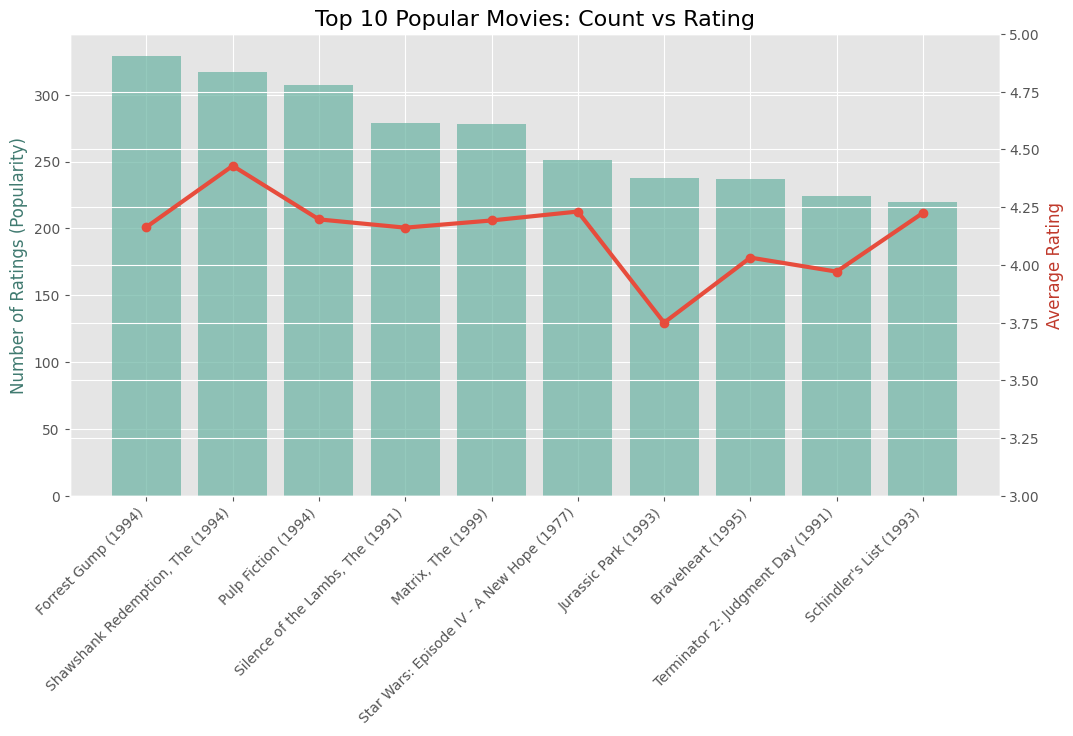

In [18]:
# 1. Calculate Stats (Count & Mean)
movie_stats = rating_files.groupby('movieId').agg({'rating': ['count', 'mean']})
movie_stats.columns = ['rating_count', 'mean_rating']

# 2. Get Top 10 Most Popular
top_10 = movie_stats.sort_values('rating_count', ascending=False).head(10)
top_10 = top_10.merge(movie_files, on='movieId', how='left')

# 3. Plot Dual-Axis Chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Axis: Popularity (Bars)
ax1.bar(top_10['title'], top_10['rating_count'], color='#69b3a2', alpha=0.7)
ax1.set_ylabel('Number of Ratings (Popularity)', color='#407a70', fontsize=12)
ax1.set_xticklabels(top_10['title'], rotation=45, ha='right')

# Right Axis: Rating (Line)
ax2 = ax1.twinx()
ax2.plot(top_10['title'], top_10['mean_rating'], color='#e74c3c', marker='o', linewidth=3)
ax2.set_ylabel('Average Rating', color='#c0392b', fontsize=12)
ax2.set_ylim(3, 5) # Focus on the 3-5 star range for clarity

plt.title('Top 10 Popular Movies: Count vs Rating', fontsize=16)
plt.show()

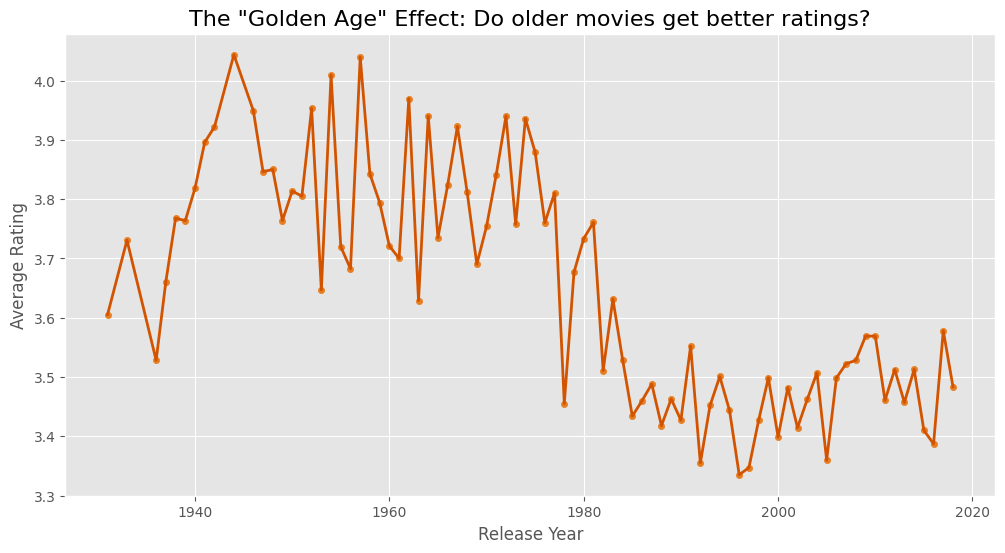

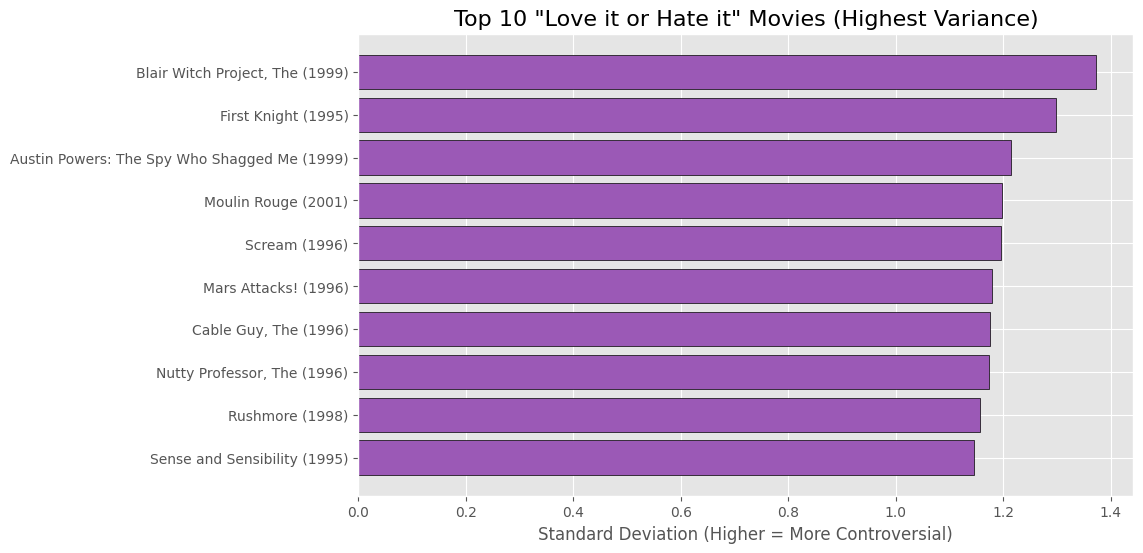

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [19]:
# ==========================================
# 1. The "Golden Age" Effect (Year vs Rating)
# ==========================================
# Extract Year from "Toy Story (1995)"
movie_files['year'] = movie_files['title'].str.extract(r'\((\d{4})\)')
movie_files['year'] = pd.to_numeric(movie_files['year'], errors='coerce')

# Merge & Agg
merged = rating_files.merge(movie_files, on='movieId')
year_stats = merged.groupby('year').agg({'rating': ['mean', 'count']})
year_stats.columns = ['mean_rating', 'count']
# Filter out years with very few ratings to avoid noise
year_stats = year_stats[year_stats['count'] > 50]

plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats['mean_rating'], color='#d35400', linewidth=2)
plt.scatter(year_stats.index, year_stats['mean_rating'], color='#e67e22', s=20)

plt.title('The "Golden Age" Effect: Do older movies get better ratings?', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()


# ==========================================
# 2. Most Controversial Movies (High Variance)
# ==========================================
# Calculate Std Dev
movie_stats = rating_files.groupby('movieId').agg({'rating': ['std', 'count']})
movie_stats.columns = ['std', 'count']
# Filter for popular movies only (>50 ratings)
popular_stats = movie_stats[movie_stats['count'] > 50].copy()
# Get Top 10 Highest Std Dev
top_controversial = popular_stats.sort_values('std', ascending=False).head(10)
# Merge titles
top_controversial = top_controversial.merge(movie_files[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 6))
plt.barh(top_controversial['title'], top_controversial['std'], color='#9b59b6', edgecolor='black')
plt.title('Top 10 "Love it or Hate it" Movies (Highest Variance)', fontsize=16)
plt.xlabel('Standard Deviation (Higher = More Controversial)', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


# ==========================================
# 3. User Behavior: Cynicism vs Experience
# ==========================================
user_stats = rating_files.groupby('userId').agg({'rating': ['count', 'mean']})
user_stats.columns = ['rating_count', 'mean_rating']

plt.figure(figsize=(10, 6))
sns.regplot(x='rating_count', y='mean_rating', data=user_stats, 
            scatter_kws={'alpha':0.5, 'color':'#3498db'}, 
            line_kws={'color':'#e74c3c'})

plt.title('Are Frequent Watchers More Critical?', fontsize=16)
plt.xlabel('Number of Ratings (Log Scale)', fontsize=12)
plt.ylabel('Average Rating Given', fontsize=12)
plt.xscale('log') 
plt.show()

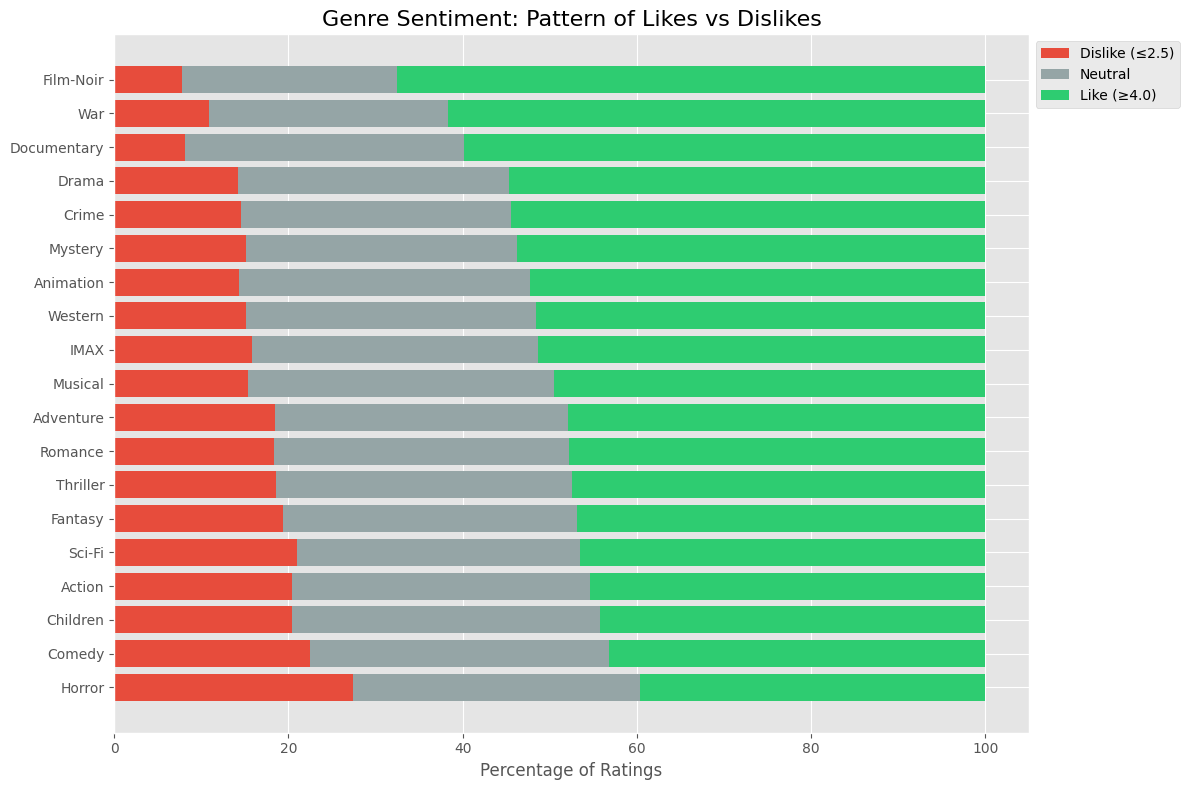

In [20]:
# 1. Explode Genres (One row per genre per movie)
movie_files['genres_list'] = movie_files['genres'].str.split('|')
movies_exploded = movie_files.explode('genres_list')
merged_data = rating_files.merge(movies_exploded, on='movieId')

# 2. Define Categories
# Like >= 4.0, Dislike <= 2.5
def get_sentiment(rating):
    if rating >= 4.0: return 'Like'
    elif rating <= 2.5: return 'Dislike'
    else: return 'Neutral'

merged_data['sentiment'] = merged_data['rating'].apply(get_sentiment)

# 3. Aggregate & Normalize
genre_counts = merged_data.groupby(['genres_list', 'sentiment']).size().unstack(fill_value=0)
# Filter noise (Keep genres with >500 ratings)
genre_counts = genre_counts[genre_counts.sum(axis=1) > 500]
# Convert to Percentage
genre_pct = genre_counts.div(genre_counts.sum(axis=1), axis=0) * 100
# Sort by "Like" %
genre_pct = genre_pct.sort_values('Like', ascending=True)

# 4. Plot Stacked Bar
plt.figure(figsize=(12, 8))
# Dislike (Red)
plt.barh(genre_pct.index, genre_pct['Dislike'], color='#e74c3c', label='Dislike (≤2.5)')
# Neutral (Gray) - stacked on Dislike
plt.barh(genre_pct.index, genre_pct['Neutral'], left=genre_pct['Dislike'], color='#95a5a6', label='Neutral')
# Like (Green) - stacked on Dislike + Neutral
plt.barh(genre_pct.index, genre_pct['Like'], left=genre_pct['Dislike']+genre_pct['Neutral'], color='#2ecc71', label='Like (≥4.0)')

plt.title('Genre Sentiment: Pattern of Likes vs Dislikes', fontsize=16)
plt.xlabel('Percentage of Ratings', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [2]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [6]:
# 2. Text Summary Report
print("=== EDA Summary Report ===")
print(f"Total Ratings: {len(rating_files)}")
print(f"Unique Users: {rating_files['userId'].nunique()}")
print(f"Unique Movies (Rated): {rating_files['movieId'].nunique()}")
print(f"Total Movies in Catalog: {len(movie_files)}")
print(f"Missing TMDB IDs: {links_files['tmdbId'].isnull().sum()}")

# 3. Create the Dashboard (4 Subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot A: Rating Distribution (using rating_files)
counts = rating_files['rating'].value_counts().sort_index()
axes[0, 0].bar(counts.index, counts.values, width=0.4, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution')

# Plot B: User Activity (using rating_files)
user_activity = rating_files.groupby('userId').size()
axes[0, 1].hist(user_activity, bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('User Activity (Log Scale)')

# Plot C: Movie Popularity (using rating_files)
movie_popularity = rating_files.groupby('movieId').size()
axes[1, 0].hist(movie_popularity, bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Movie Popularity (Log Scale)')

# Plot D: Top Genres (using movie_files)
genres = movie_files['genres'].str.split('|').explode().value_counts().head(10)
axes[1, 1].barh(genres.index, genres.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Top 10 Genres')
axes[1, 1].invert_yaxis()

plt.suptitle('ReelSense Data Overview', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Missing Values Heatmap (using links_files)
plt.figure(figsize=(10, 2))
sns.heatmap(links_files.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Map (Yellow = Missing)', fontsize=14)
plt.show()

=== EDA Summary Report ===


NameError: name 'rating_files' is not defined

In [9]:
rating_files = pd.read_csv('data/ratings.csv')
movie_files = pd.read_csv('data/movies.csv')
tags_files = pd.read_csv('data/tags.csv')
links_files = pd.read_csv('data/links.csv')

In [8]:
import pandas as pd


=== EDA Summary Report ===
Total Ratings: 100836
Unique Users: 610
Unique Movies (Rated): 9724
Total Movies in Catalog: 9742
Missing TMDB IDs: 8


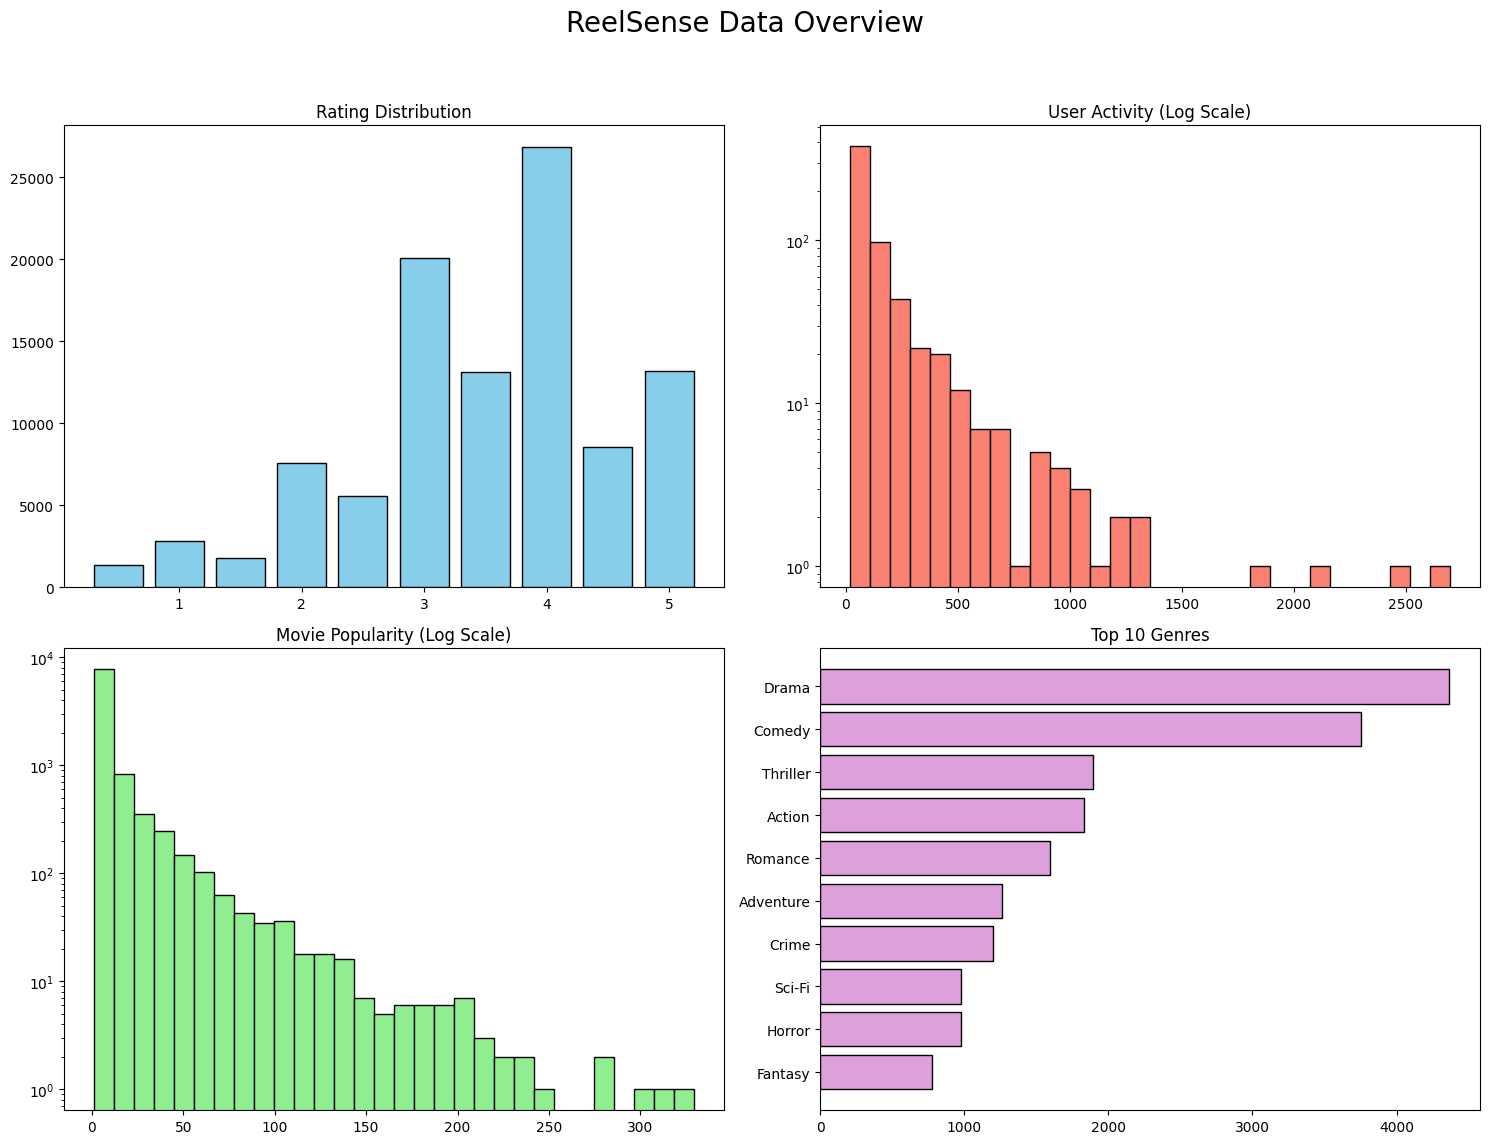

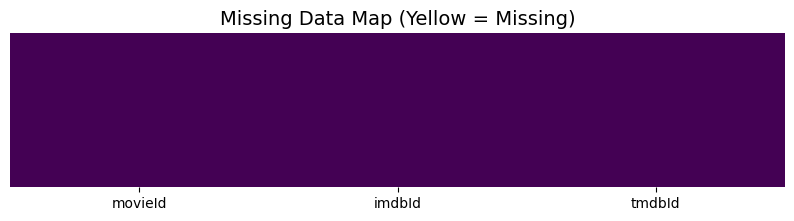

In [12]:
import matplotlib.pyplot as plt
# 2. Text Summary Report
print("=== EDA Summary Report ===")
print(f"Total Ratings: {len(rating_files)}")
print(f"Unique Users: {rating_files['userId'].nunique()}")
print(f"Unique Movies (Rated): {rating_files['movieId'].nunique()}")
print(f"Total Movies in Catalog: {len(movie_files)}")
print(f"Missing TMDB IDs: {links_files['tmdbId'].isnull().sum()}")

# 3. Create the Dashboard (4 Subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot A: Rating Distribution (using rating_files)
counts = rating_files['rating'].value_counts().sort_index()
axes[0, 0].bar(counts.index, counts.values, width=0.4, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution')

# Plot B: User Activity (using rating_files)
user_activity = rating_files.groupby('userId').size()
axes[0, 1].hist(user_activity, bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('User Activity (Log Scale)')

# Plot C: Movie Popularity (using rating_files)
movie_popularity = rating_files.groupby('movieId').size()
axes[1, 0].hist(movie_popularity, bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Movie Popularity (Log Scale)')

# Plot D: Top Genres (using movie_files)
genres = movie_files['genres'].str.split('|').explode().value_counts().head(10)
axes[1, 1].barh(genres.index, genres.values, color='plum', edgecolor='black')
axes[1, 1].set_title('Top 10 Genres')
axes[1, 1].invert_yaxis()

plt.suptitle('ReelSense Data Overview', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Missing Values Heatmap (using links_files)
plt.figure(figsize=(10, 2))
sns.heatmap(links_files.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Map (Yellow = Missing)', fontsize=14)
plt.show()

In [1]:
%pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Compiling surprise/similarities.pyx because it changed.
      Compiling surprise/prediction_algorithms/matrix_factorization.pyx because it changed.
      Compiling surprise/prediction_algorithms/optimize_baselines.pyx because it changed.
      Compiling surprise/prediction_algorithms/slope_one.pyx because it changed.
      Compiling surprise/prediction_algorithms/co_clustering.pyx because it changed.
      [1/5] Cythonizing surprise/prediction_algorithms/co_clustering.pyx
      
      Error compiling Cython file:
      ------------------------------------------------------------
      ...
              self.avg_cltr_i = avg_cltr_i
              self.avg_cocltr = avg_cocltr
      
              return self
      
          def compute_averages(self, np.ndarray[np.int_t] cltr_u,
                                                   ^
  

Data Loaded into variables: new_rating, new_movie, new_movie_genre, new_links, new_tags


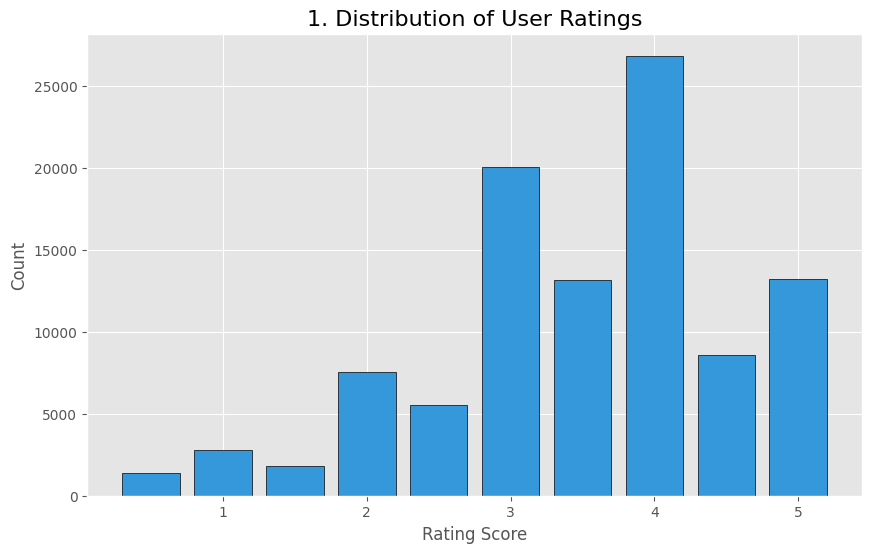

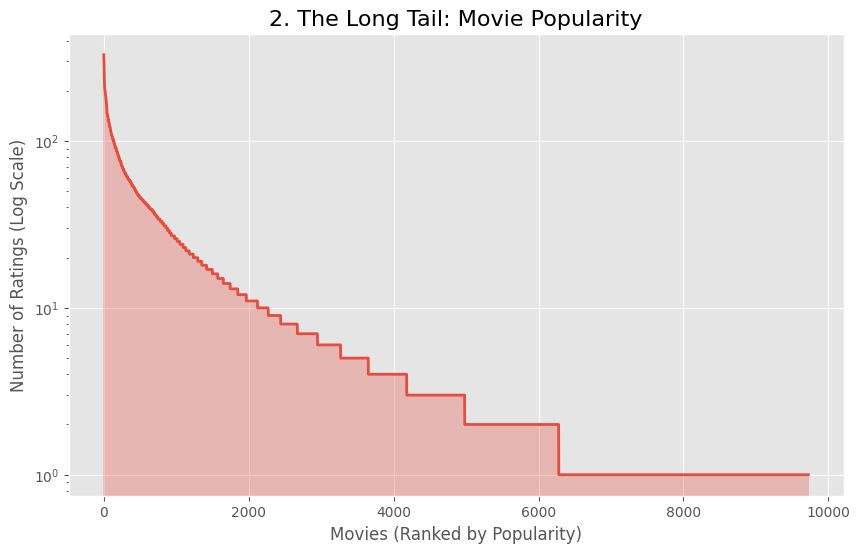

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3758532655.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


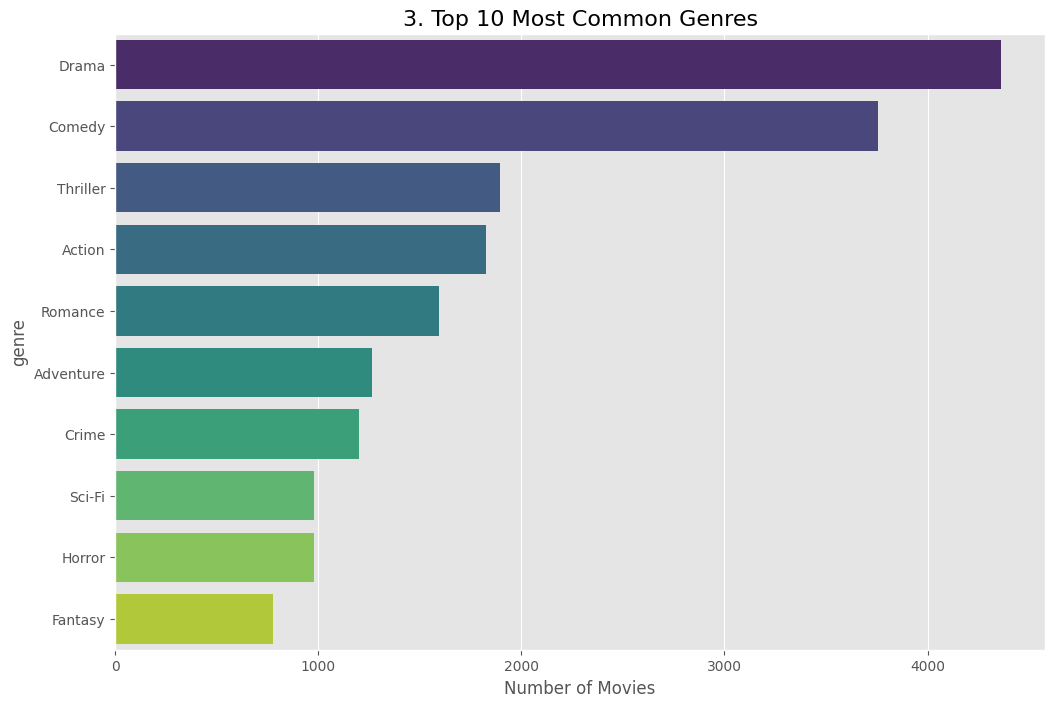

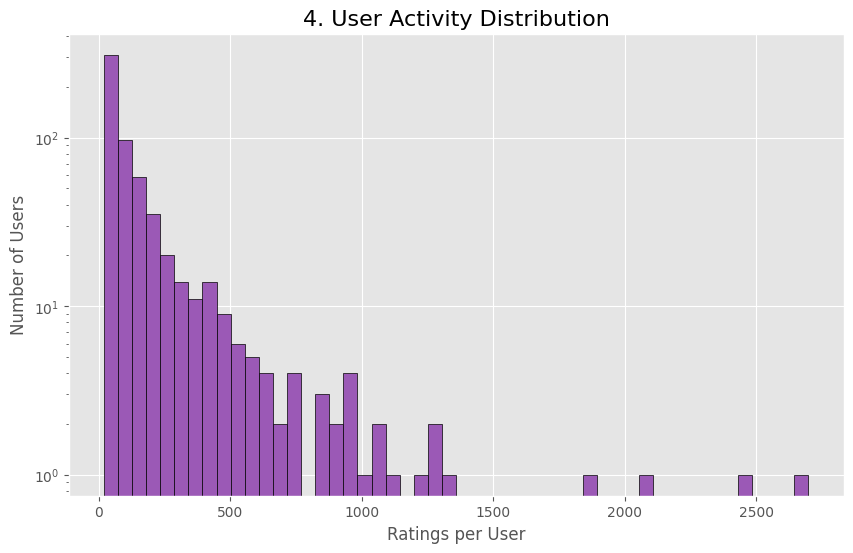

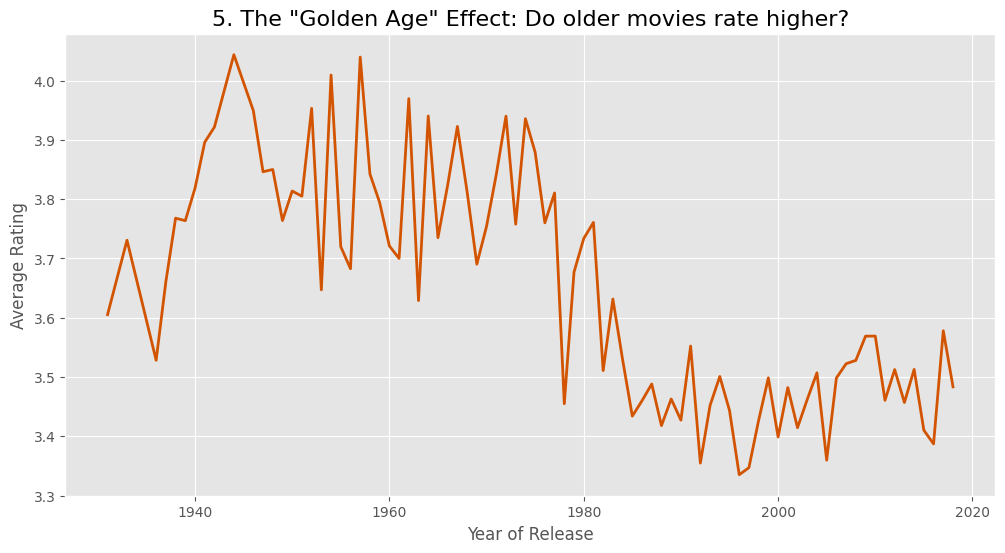

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3758532655.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='std', y='title', data=top_controversial, palette='magma')


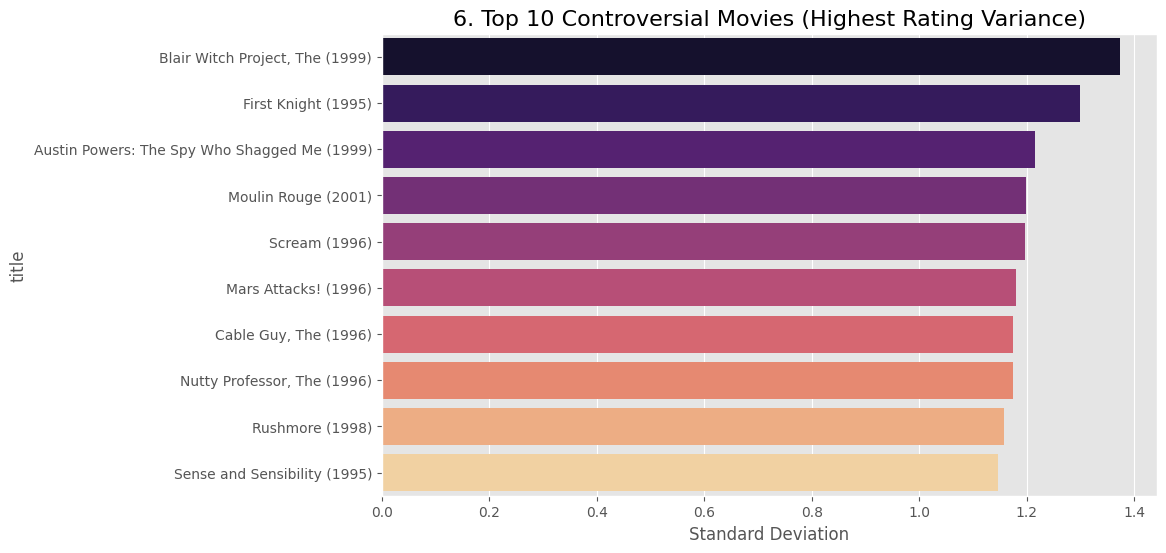

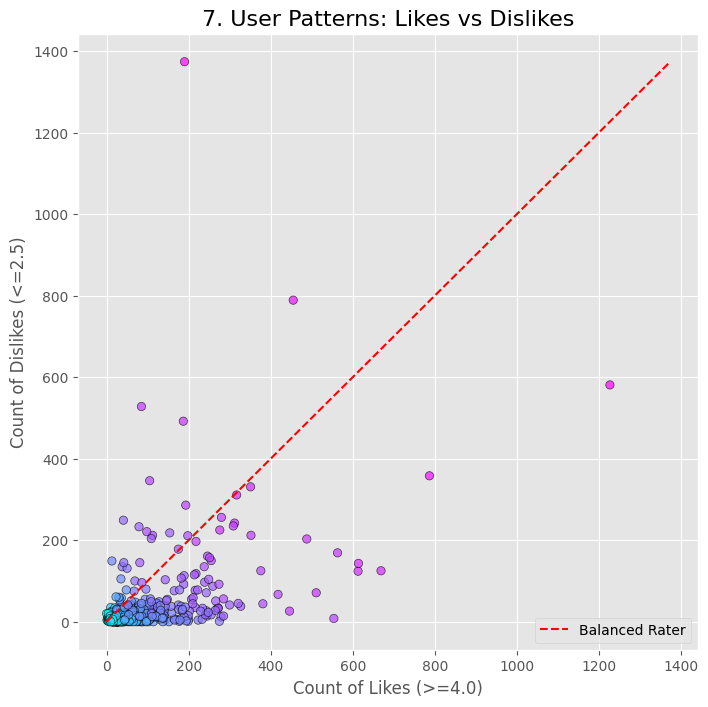

<Figure size 1200x800 with 0 Axes>

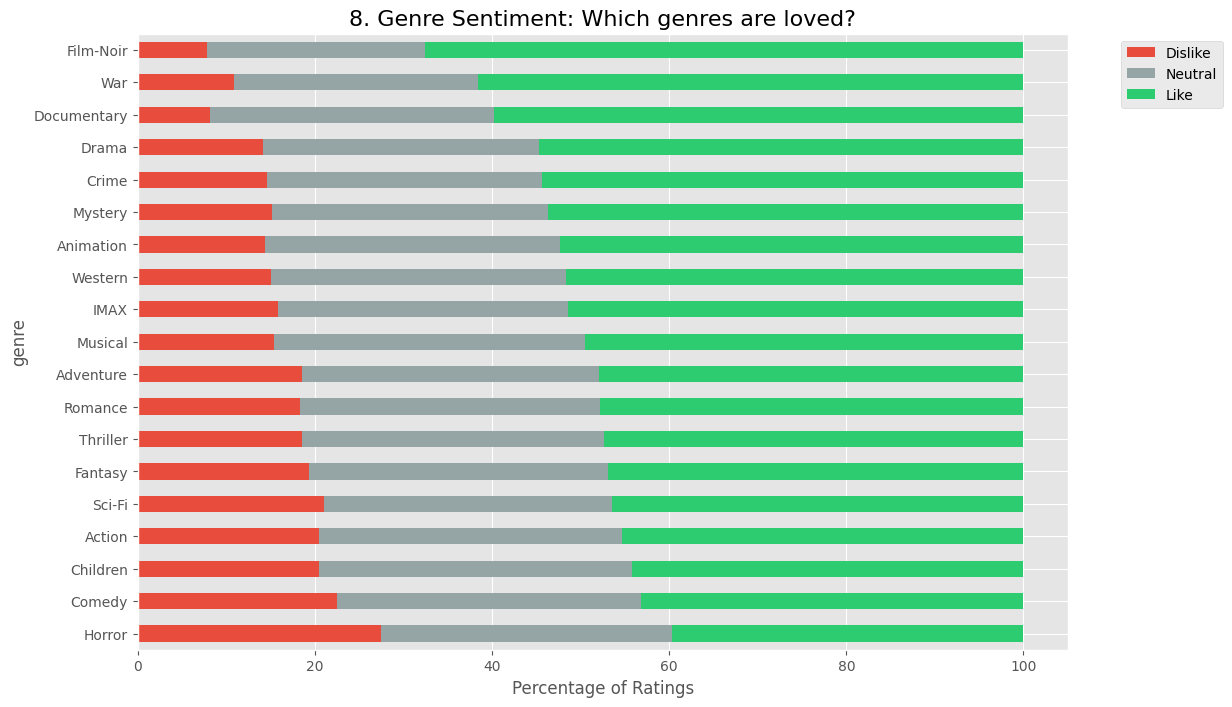

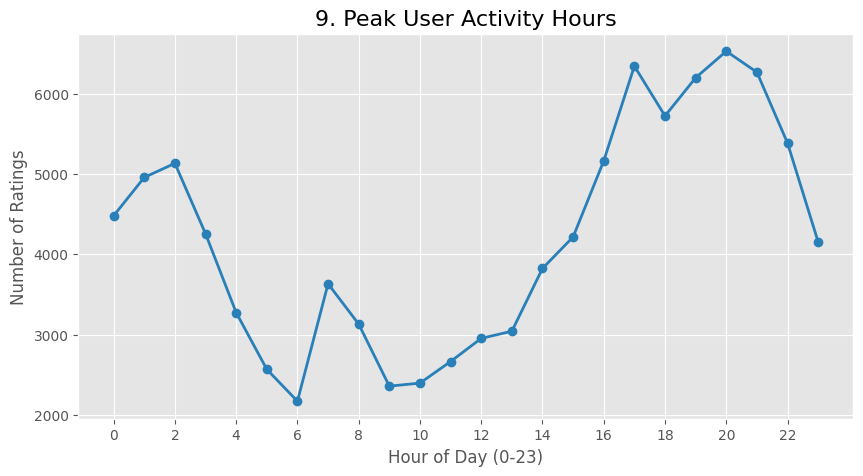

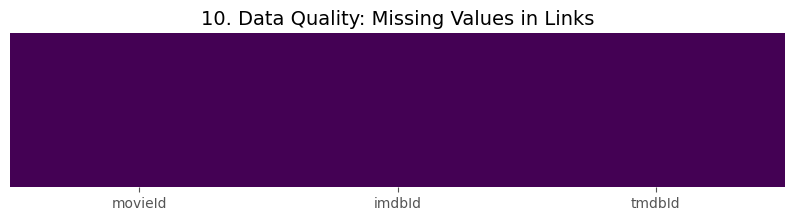

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3758532655.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')


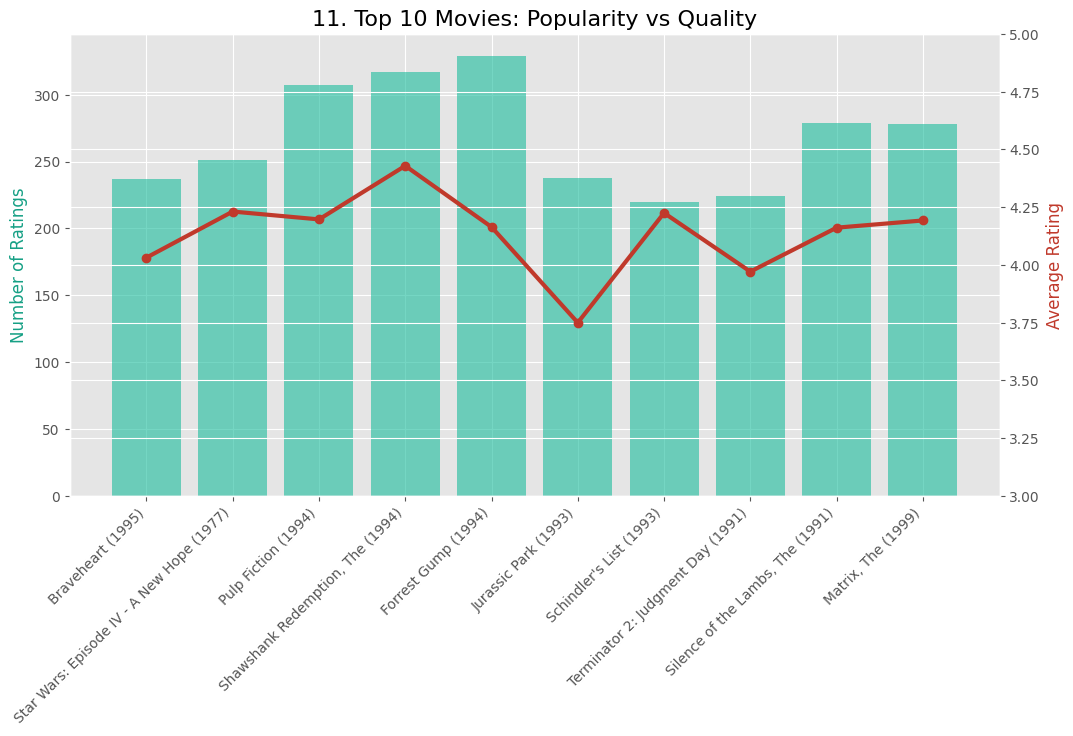

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. LOAD & PREPROCESS DATA
# ==========================================
# Loading data with the requested variable names
new_rating = pd.read_csv('cleaned_data/ratings.csv')
new_movie = pd.read_csv('cleaned_data/movies.csv')
new_movie_genre = pd.read_csv('cleaned_data/movie_genre.csv')
new_links = pd.read_csv('cleaned_data/links.csv')
new_tags = pd.read_csv('cleaned_data/tags.csv')

# --- Preprocessing Step 1: Fix Dates ---
# Combine 'date' and 'time' columns into a single datetime object
new_rating['datetime'] = pd.to_datetime(new_rating['date'] + ' ' + new_rating['time'])

# --- Preprocessing Step 2: Merge Genres ---
# Since genres are in a separate file, we create a 'genres' string column in new_movie
# for easy display in charts.
genres_agg = new_movie_genre.groupby('movieid')['genre'].apply(lambda x: '|'.join(x)).reset_index()
genres_agg.columns = ['movieId', 'genres']
new_movie = new_movie.merge(genres_agg, on='movieId', how='left')
new_movie['genres'] = new_movie['genres'].fillna('(no genres listed)')

# Set global style
plt.style.use('ggplot')
sns.set_palette("viridis")

print("Data Loaded into variables: new_rating, new_movie, new_movie_genre, new_links, new_tags")

# ==========================================
# 2. GENERATE VISUALIZATIONS
# ==========================================

# --- Graph 1: Rating Distribution ---
plt.figure(figsize=(10, 6))
counts = new_rating['rating'].value_counts().sort_index()
plt.bar(counts.index, counts.values, width=0.4, color='#3498db', edgecolor='black')
plt.title('1. Distribution of User Ratings', fontsize=16)
plt.xlabel('Rating Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- Graph 2: Long Tail Distribution (Popularity) ---
plt.figure(figsize=(10, 6))
popularity = new_rating.groupby('movieId').size().sort_values(ascending=False).values
plt.plot(range(len(popularity)), popularity, color='#e74c3c', linewidth=2)
plt.fill_between(range(len(popularity)), popularity, color='#e74c3c', alpha=0.3)
plt.title('2. The Long Tail: Movie Popularity', fontsize=16)
plt.xlabel('Movies (Ranked by Popularity)', fontsize=12)
plt.ylabel('Number of Ratings (Log Scale)', fontsize=12)
plt.yscale('log')
plt.show()

# --- Graph 3: Top 10 Genres ---
plt.figure(figsize=(12, 8))
top_genres = new_movie_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('3. Top 10 Most Common Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.show()

# --- Graph 4: User Activity ---
plt.figure(figsize=(10, 6))
user_counts = new_rating.groupby('userId').size()
plt.hist(user_counts, bins=50, color='#9b59b6', edgecolor='black')
plt.title('4. User Activity Distribution', fontsize=16)
plt.xlabel('Ratings per User', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log')
plt.show()

# --- Graph 5: The "Golden Age" Effect (Year vs Rating) ---
# Extract Year from Title
new_movie['year'] = new_movie['title'].str.extract(r'\((\d{4})\)')
new_movie['year'] = pd.to_numeric(new_movie['year'], errors='coerce')

# Merge & Aggregate
merged_year = new_rating.merge(new_movie, on='movieId')
year_stats = merged_year.groupby('year').agg({'rating': ['mean', 'count']})
year_stats.columns = ['mean_rating', 'count']
# Filter out years with very few ratings (noise)
year_stats = year_stats[year_stats['count'] > 50]

plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats['mean_rating'], color='#d35400', linewidth=2)
plt.title('5. The "Golden Age" Effect: Do older movies rate higher?', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

# --- Graph 6: Controversial Movies (High Variance) ---
movie_stats = new_rating.groupby('movieId').agg({'rating': ['std', 'count']})
movie_stats.columns = ['std', 'count']
# Filter for significant popularity (>50 ratings)
top_controversial = movie_stats[movie_stats['count'] > 50].sort_values('std', ascending=False).head(10)
top_controversial = top_controversial.merge(new_movie[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 6))
sns.barplot(x='std', y='title', data=top_controversial, palette='magma')
plt.title('6. Top 10 Controversial Movies (Highest Rating Variance)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=12)
plt.show()

# --- Graph 7: User Likes vs Dislikes ---
new_rating['is_like'] = new_rating['rating'] >= 4.0
new_rating['is_dislike'] = new_rating['rating'] <= 2.5
user_patterns = new_rating.groupby('userId').agg({'is_like':'sum', 'is_dislike':'sum', 'rating':'count'}).reset_index()

plt.figure(figsize=(8, 8))
plt.scatter(user_patterns['is_like'], user_patterns['is_dislike'], 
            c=np.log1p(user_patterns['rating']), cmap='cool', alpha=0.7, edgecolors='k')
# Diagonal line
max_val = max(user_patterns['is_like'].max(), user_patterns['is_dislike'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Balanced Rater')

plt.title('7. User Patterns: Likes vs Dislikes', fontsize=16)
plt.xlabel('Count of Likes (>=4.0)', fontsize=12)
plt.ylabel('Count of Dislikes (<=2.5)', fontsize=12)
plt.legend()
plt.show()

# --- Graph 8: Genre Sentiment (Stacked Bar) ---
merged_genre = new_rating.merge(new_movie_genre, left_on='movieId', right_on='movieid')
merged_genre['sentiment'] = pd.cut(merged_genre['rating'], bins=[0, 2.5, 3.5, 5], labels=['Dislike', 'Neutral', 'Like'])

genre_sentiment = merged_genre.groupby(['genre', 'sentiment'], observed=False).size().unstack(fill_value=0)
genre_sentiment = genre_sentiment[genre_sentiment.sum(axis=1) > 500] # Filter noise
genre_pct = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0) * 100
genre_pct = genre_pct.sort_values('Like')

plt.figure(figsize=(12, 8))
genre_pct.plot(kind='barh', stacked=True, color=['#e74c3c', '#95a5a6', '#2ecc71'], figsize=(12, 8))
plt.title('8. Genre Sentiment: Which genres are loved?', fontsize=16)
plt.xlabel('Percentage of Ratings', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# --- Graph 9: Hourly Activity ---
hourly_counts = new_rating.groupby(new_rating['datetime'].dt.hour).size()

plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#2980b9', linewidth=2)
plt.title('9. Peak User Activity Hours', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

# --- Graph 10: Missing Values (Links) ---
plt.figure(figsize=(10, 2))
sns.heatmap(new_links.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('10. Data Quality: Missing Values in Links', fontsize=14)
plt.show()

# --- Graph 11: Popularity vs Quality (Top 10 Movies) ---
top_10_ids = new_rating.groupby('movieId').size().sort_values(ascending=False).head(10).index
top_10_data = new_rating[new_rating['movieId'].isin(top_10_ids)].groupby('movieId').agg({'rating':['mean', 'count']})
top_10_data.columns = ['mean', 'count']
top_10_data = top_10_data.merge(new_movie[['movieId', 'title']], on='movieId')

fig, ax1 = plt.subplots(figsize=(12, 6))
# Bar chart for Popularity
ax1.bar(top_10_data['title'], top_10_data['count'], color='#1abc9c', alpha=0.6, label='Popularity')
ax1.set_ylabel('Number of Ratings', color='#16a085')
ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')

# Line chart for Rating
ax2 = ax1.twinx()
ax2.plot(top_10_data['title'], top_10_data['mean'], color='#c0392b', marker='o', linewidth=3, label='Avg Rating')
ax2.set_ylabel('Average Rating', color='#c0392b')
ax2.set_ylim(3, 5)

plt.title('11. Top 10 Movies: Popularity vs Quality', fontsize=16)
plt.show()

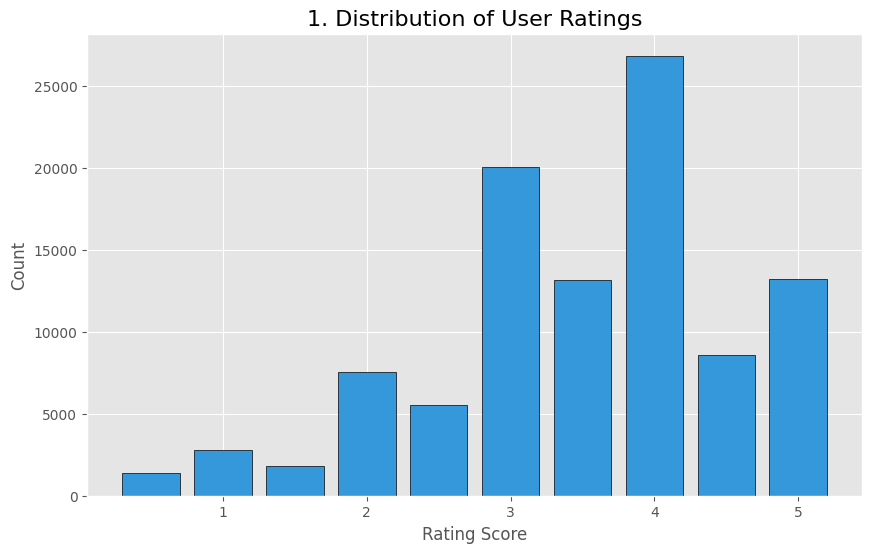

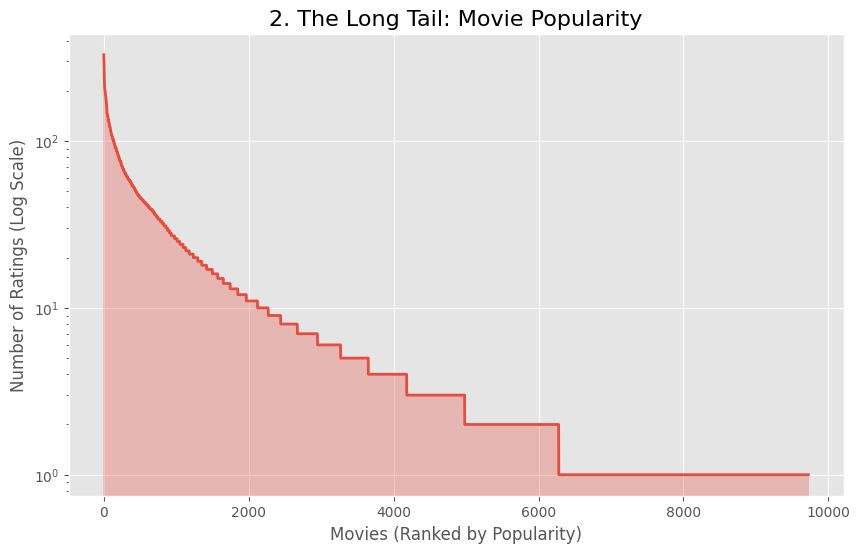

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3986559340.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


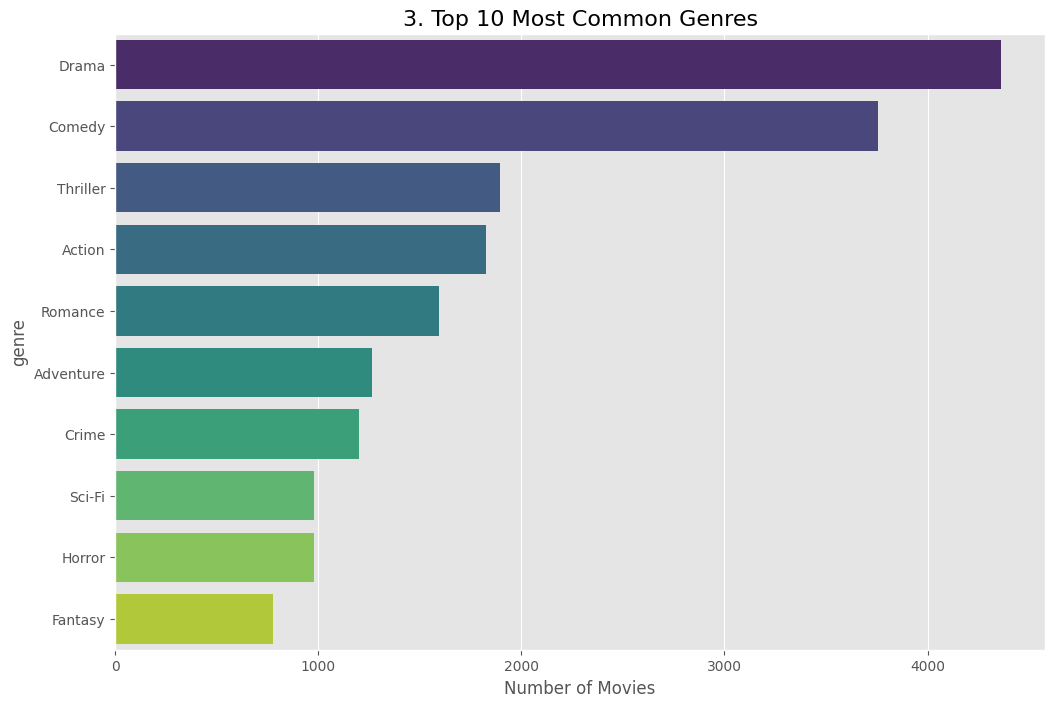

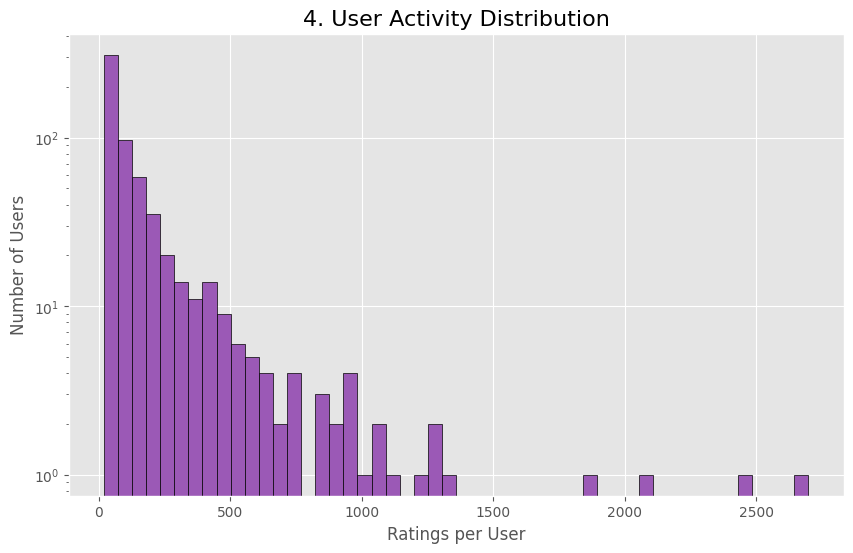

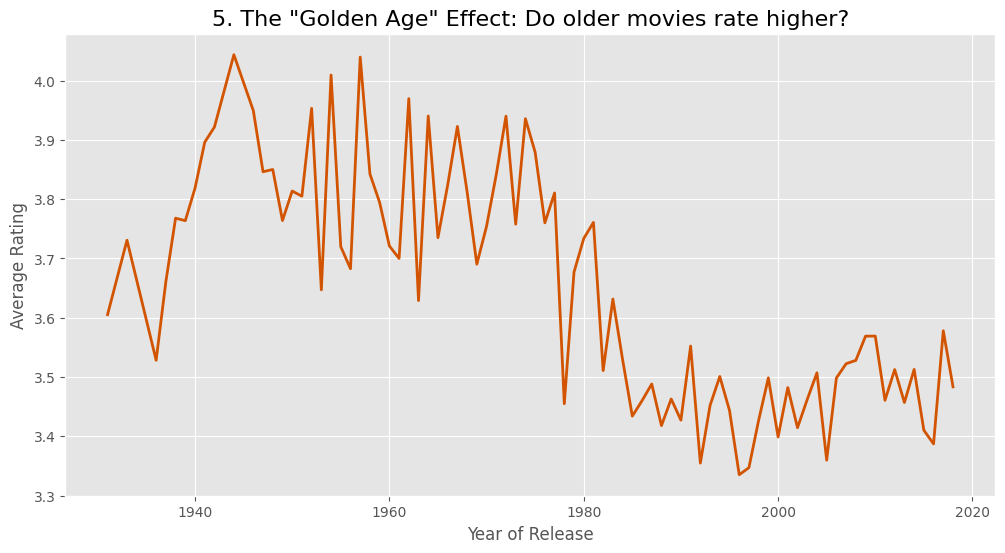

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3986559340.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='std', y='title', data=top_controversial, palette='magma')


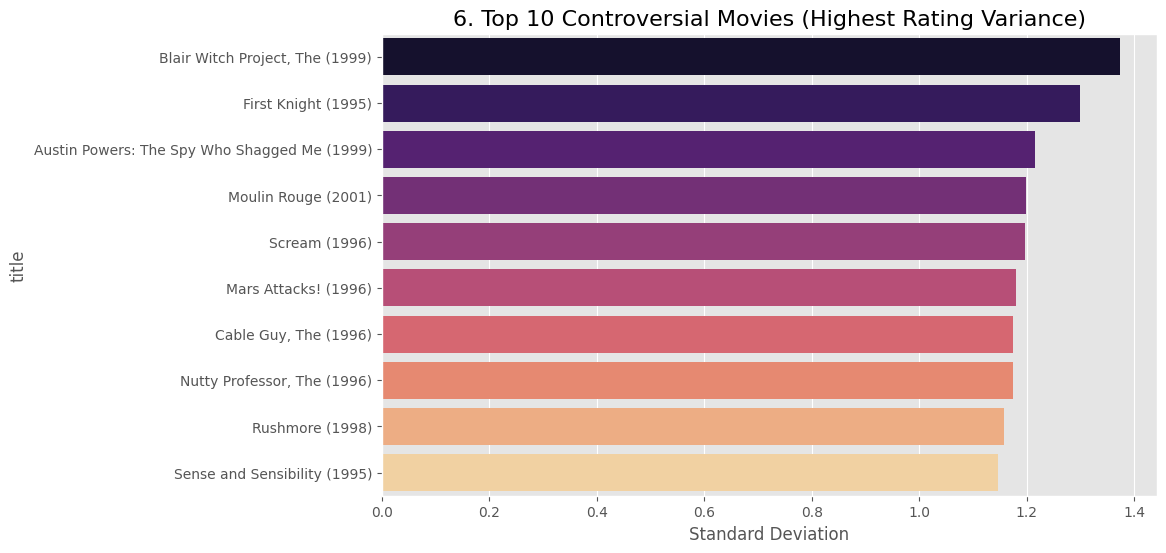

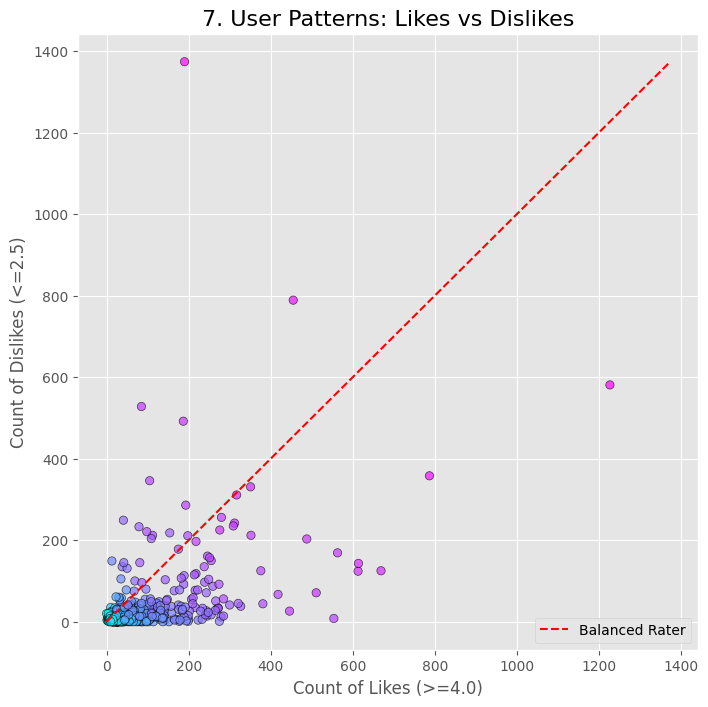

<Figure size 1200x800 with 0 Axes>

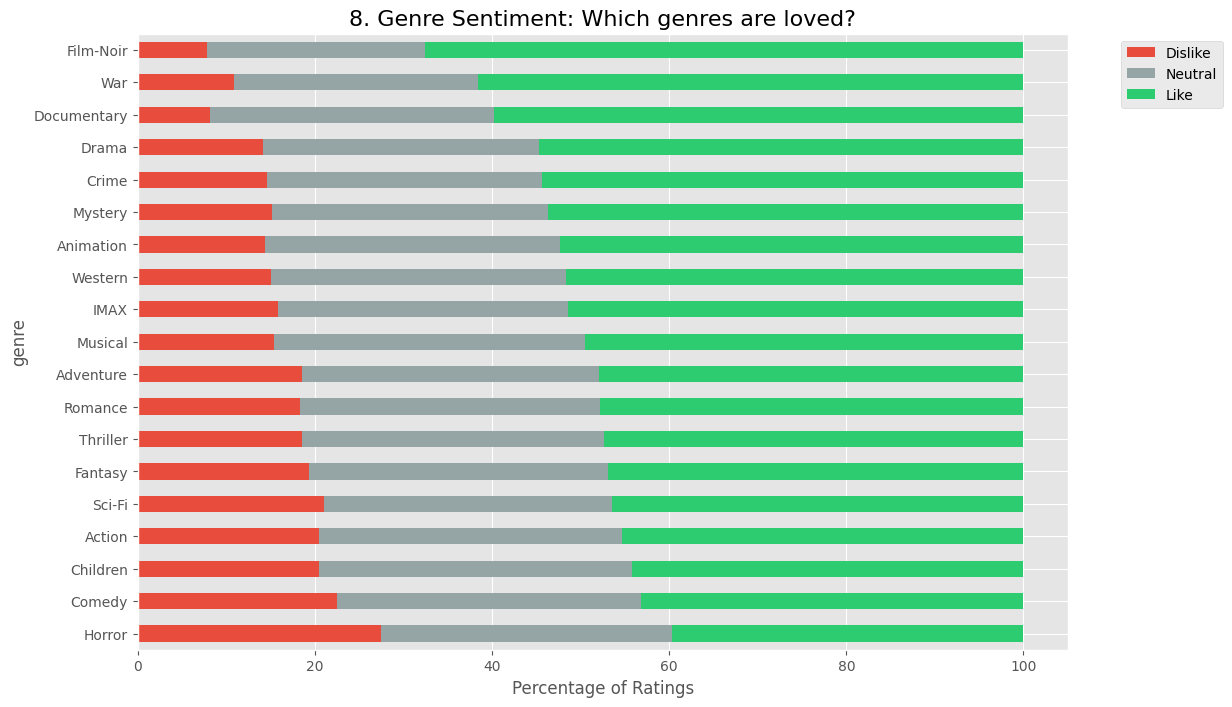

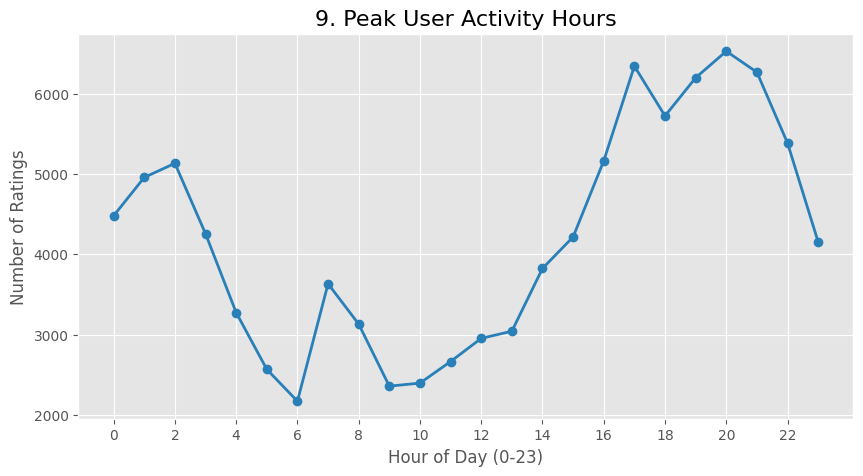

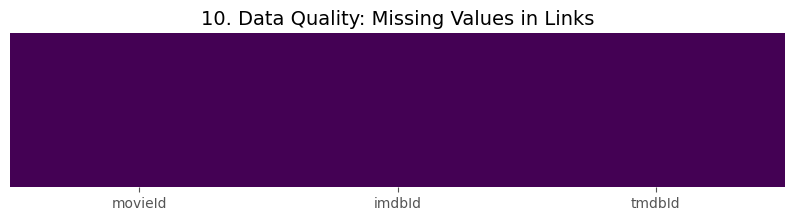

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3986559340.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')


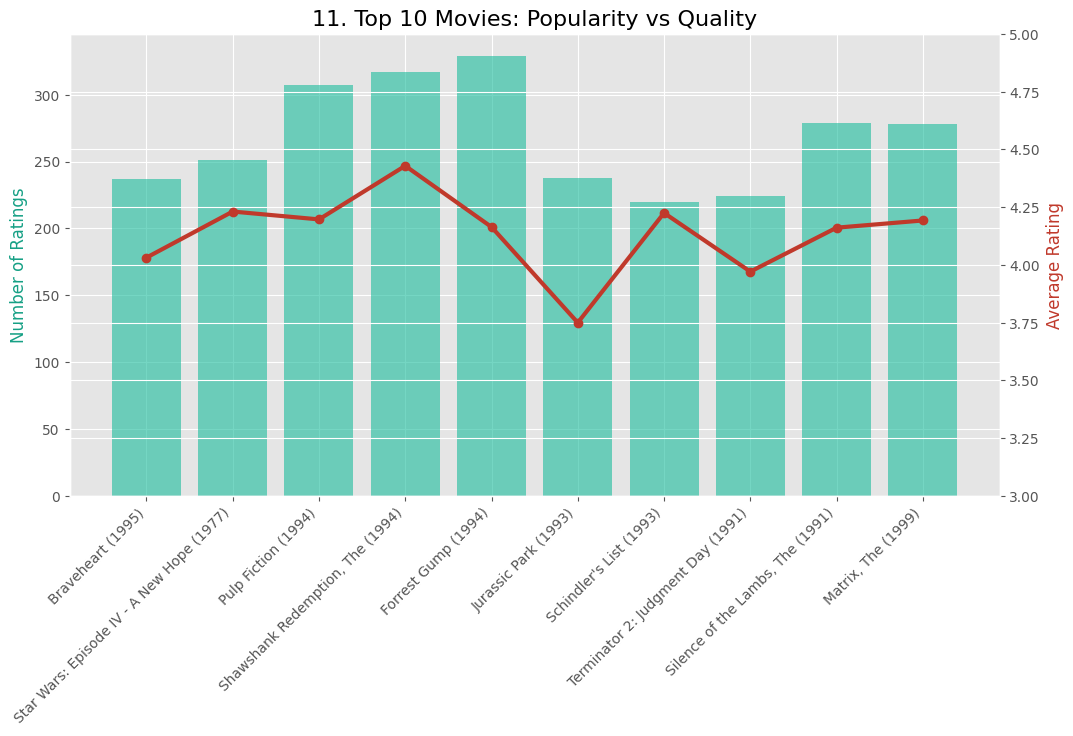

In [3]:
# ==========================================
# 2. GENERATE VISUALIZATIONS
# ==========================================

# --- Graph 1: Rating Distribution ---
plt.figure(figsize=(10, 6))
counts = new_rating['rating'].value_counts().sort_index()
plt.bar(counts.index, counts.values, width=0.4, color='#3498db', edgecolor='black')
plt.title('1. Distribution of User Ratings', fontsize=16)
plt.xlabel('Rating Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- Graph 2: Long Tail Distribution (Popularity) ---
plt.figure(figsize=(10, 6))
popularity = new_rating.groupby('movieId').size().sort_values(ascending=False).values
plt.plot(range(len(popularity)), popularity, color='#e74c3c', linewidth=2)
plt.fill_between(range(len(popularity)), popularity, color='#e74c3c', alpha=0.3)
plt.title('2. The Long Tail: Movie Popularity', fontsize=16)
plt.xlabel('Movies (Ranked by Popularity)', fontsize=12)
plt.ylabel('Number of Ratings (Log Scale)', fontsize=12)
plt.yscale('log')
plt.show()

# --- Graph 3: Top 10 Genres ---
plt.figure(figsize=(12, 8))
top_genres = new_movie_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('3. Top 10 Most Common Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.show()

# --- Graph 4: User Activity ---
plt.figure(figsize=(10, 6))
user_counts = new_rating.groupby('userId').size()
plt.hist(user_counts, bins=50, color='#9b59b6', edgecolor='black')
plt.title('4. User Activity Distribution', fontsize=16)
plt.xlabel('Ratings per User', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log')
plt.show()

# --- Graph 5: The "Golden Age" Effect (Year vs Rating) ---
# Extract Year from Title
new_movie['year'] = new_movie['title'].str.extract(r'\((\d{4})\)')
new_movie['year'] = pd.to_numeric(new_movie['year'], errors='coerce')

# Merge & Aggregate
merged_year = new_rating.merge(new_movie, on='movieId')
year_stats = merged_year.groupby('year').agg({'rating': ['mean', 'count']})
year_stats.columns = ['mean_rating', 'count']
# Filter out years with very few ratings (noise)
year_stats = year_stats[year_stats['count'] > 50]

plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats['mean_rating'], color='#d35400', linewidth=2)
plt.title('5. The "Golden Age" Effect: Do older movies rate higher?', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

# --- Graph 6: Controversial Movies (High Variance) ---
movie_stats = new_rating.groupby('movieId').agg({'rating': ['std', 'count']})
movie_stats.columns = ['std', 'count']
# Filter for significant popularity (>50 ratings)
top_controversial = movie_stats[movie_stats['count'] > 50].sort_values('std', ascending=False).head(10)
top_controversial = top_controversial.merge(new_movie[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 6))
sns.barplot(x='std', y='title', data=top_controversial, palette='magma')
plt.title('6. Top 10 Controversial Movies (Highest Rating Variance)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=12)
plt.show()

# --- Graph 7: User Likes vs Dislikes ---
new_rating['is_like'] = new_rating['rating'] >= 4.0
new_rating['is_dislike'] = new_rating['rating'] <= 2.5
user_patterns = new_rating.groupby('userId').agg({'is_like':'sum', 'is_dislike':'sum', 'rating':'count'}).reset_index()

plt.figure(figsize=(8, 8))
plt.scatter(user_patterns['is_like'], user_patterns['is_dislike'], 
            c=np.log1p(user_patterns['rating']), cmap='cool', alpha=0.7, edgecolors='k')
# Diagonal line
max_val = max(user_patterns['is_like'].max(), user_patterns['is_dislike'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Balanced Rater')

plt.title('7. User Patterns: Likes vs Dislikes', fontsize=16)
plt.xlabel('Count of Likes (>=4.0)', fontsize=12)
plt.ylabel('Count of Dislikes (<=2.5)', fontsize=12)
plt.legend()
plt.show()

# --- Graph 8: Genre Sentiment (Stacked Bar) ---
merged_genre = new_rating.merge(new_movie_genre, left_on='movieId', right_on='movieid')
merged_genre['sentiment'] = pd.cut(merged_genre['rating'], bins=[0, 2.5, 3.5, 5], labels=['Dislike', 'Neutral', 'Like'])

genre_sentiment = merged_genre.groupby(['genre', 'sentiment'], observed=False).size().unstack(fill_value=0)
genre_sentiment = genre_sentiment[genre_sentiment.sum(axis=1) > 500] # Filter noise
genre_pct = genre_sentiment.div(genre_sentiment.sum(axis=1), axis=0) * 100
genre_pct = genre_pct.sort_values('Like')

plt.figure(figsize=(12, 8))
genre_pct.plot(kind='barh', stacked=True, color=['#e74c3c', '#95a5a6', '#2ecc71'], figsize=(12, 8))
plt.title('8. Genre Sentiment: Which genres are loved?', fontsize=16)
plt.xlabel('Percentage of Ratings', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# --- Graph 9: Hourly Activity ---
hourly_counts = new_rating.groupby(new_rating['datetime'].dt.hour).size()

plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#2980b9', linewidth=2)
plt.title('9. Peak User Activity Hours', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

# --- Graph 10: Missing Values (Links) ---
plt.figure(figsize=(10, 2))
sns.heatmap(new_links.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('10. Data Quality: Missing Values in Links', fontsize=14)
plt.show()

# --- Graph 11: Popularity vs Quality (Top 10 Movies) ---
top_10_ids = new_rating.groupby('movieId').size().sort_values(ascending=False).head(10).index
top_10_data = new_rating[new_rating['movieId'].isin(top_10_ids)].groupby('movieId').agg({'rating':['mean', 'count']})
top_10_data.columns = ['mean', 'count']
top_10_data = top_10_data.merge(new_movie[['movieId', 'title']], on='movieId')

fig, ax1 = plt.subplots(figsize=(12, 6))
# Bar chart for Popularity
ax1.bar(top_10_data['title'], top_10_data['count'], color='#1abc9c', alpha=0.6, label='Popularity')
ax1.set_ylabel('Number of Ratings', color='#16a085')
ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')

# Line chart for Rating
ax2 = ax1.twinx()
ax2.plot(top_10_data['title'], top_10_data['mean'], color='#c0392b', marker='o', linewidth=3, label='Avg Rating')
ax2.set_ylabel('Average Rating', color='#c0392b')
ax2.set_ylim(3, 5)

plt.title('11. Top 10 Movies: Popularity vs Quality', fontsize=16)
plt.show()

Data Loaded.
Preprocessing Complete: Dates combined, Genres merged.


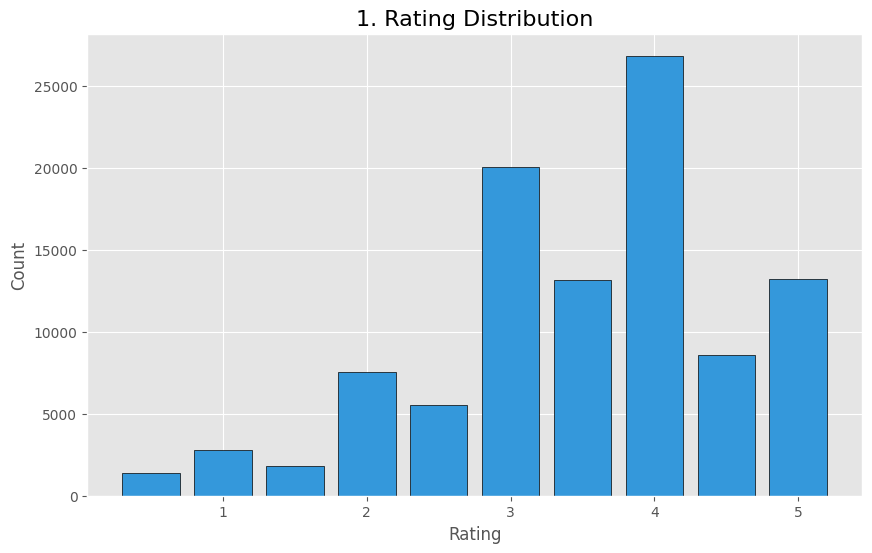

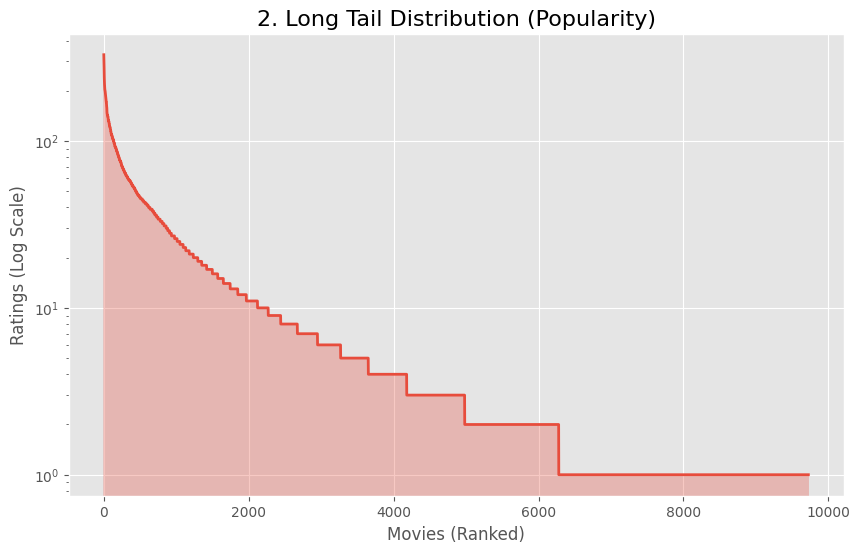

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_13772\3676241612.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


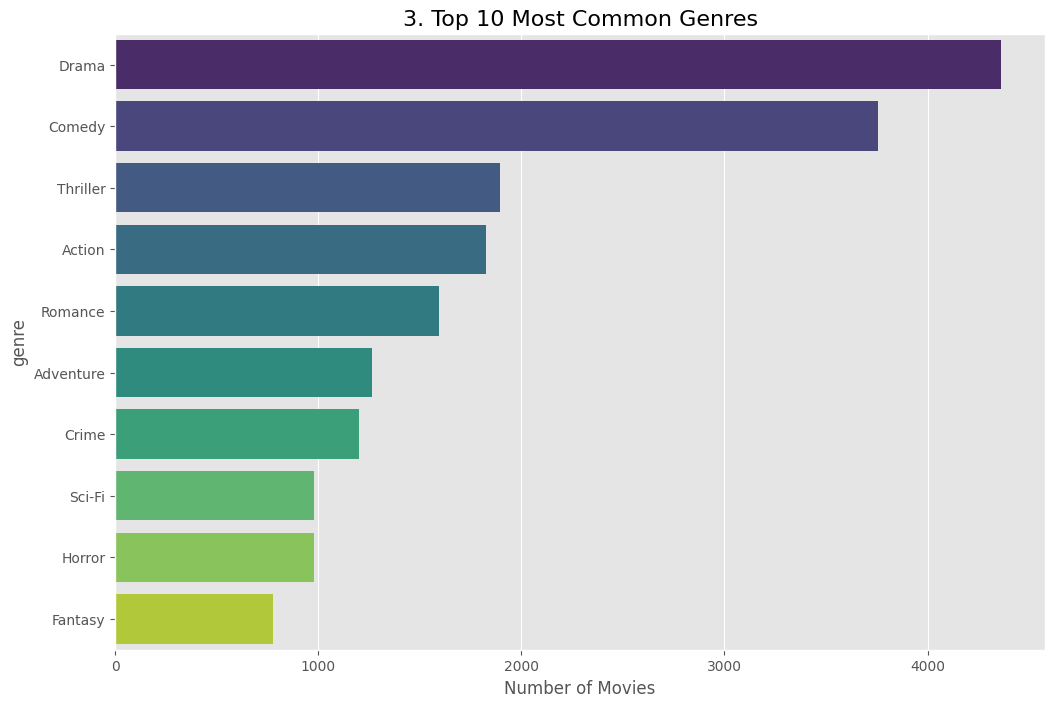

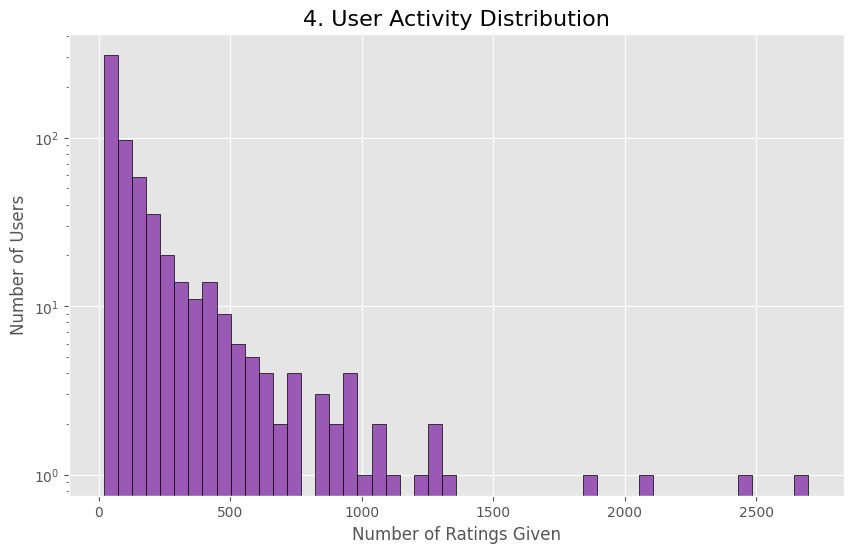

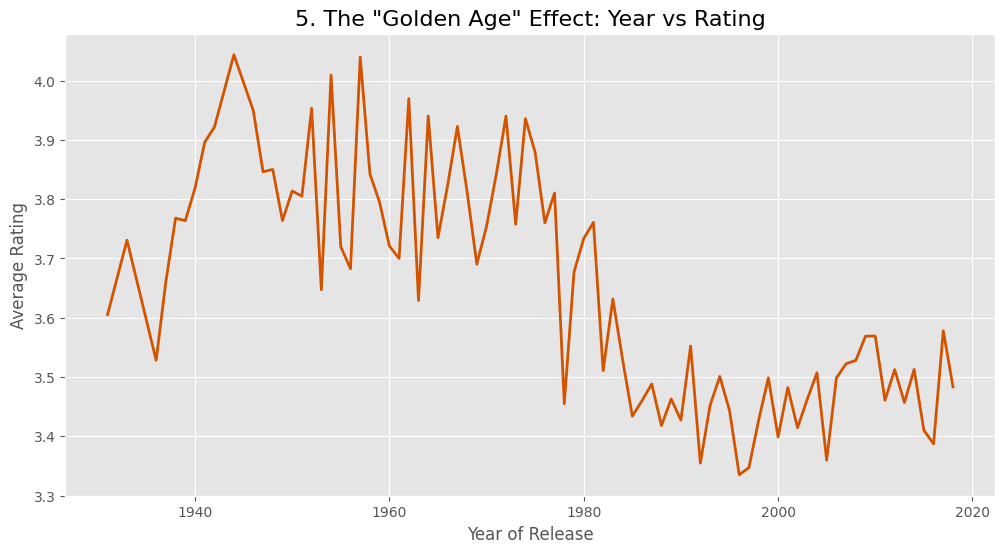

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_13772\3676241612.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='std', y='title', data=top_controversial, palette='magma')


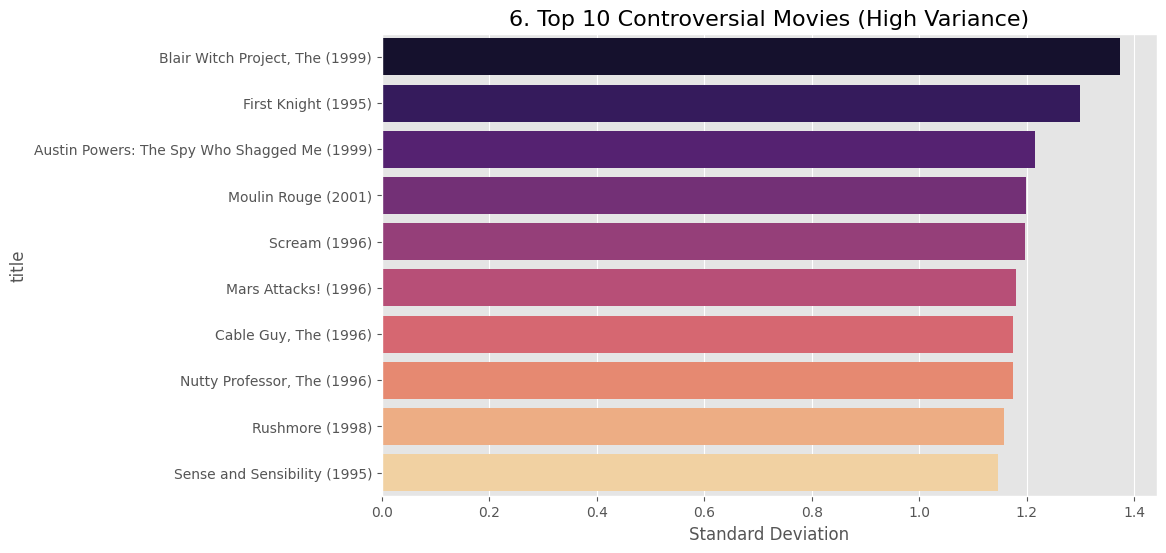

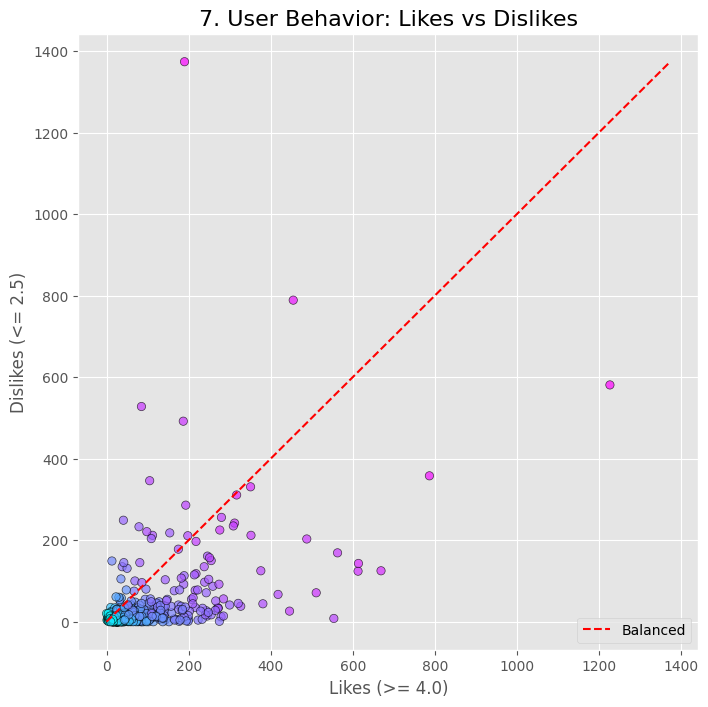

<Figure size 1200x800 with 0 Axes>

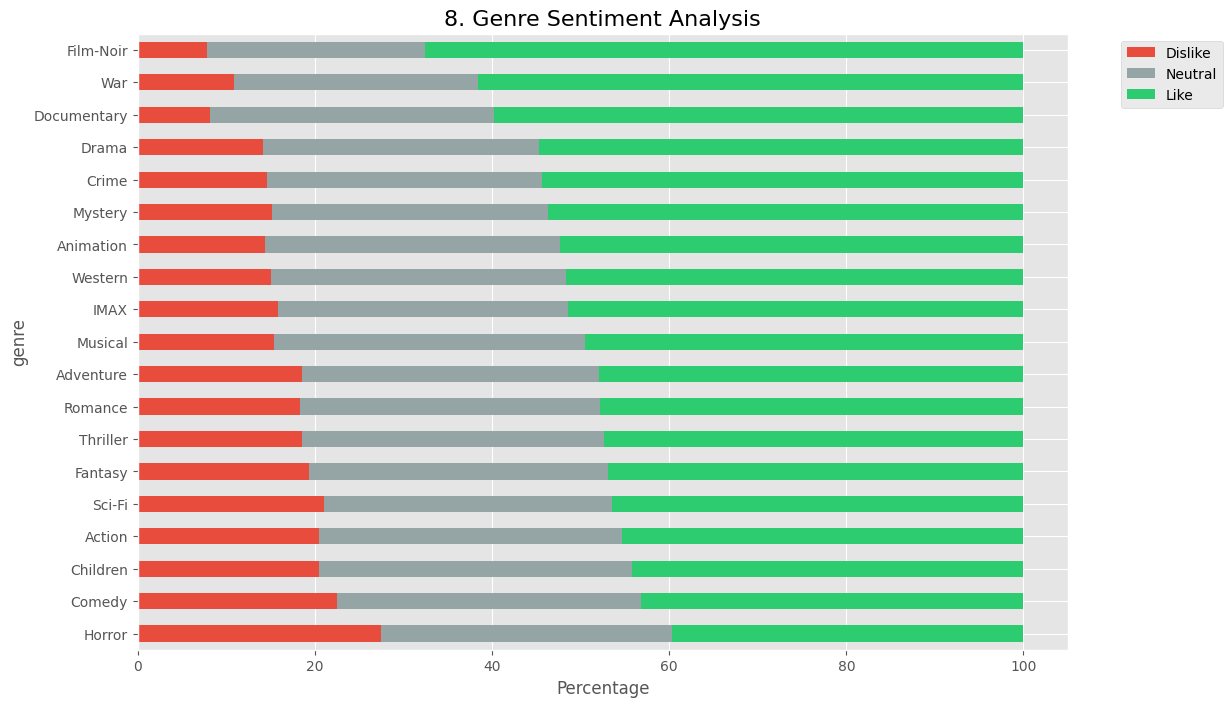

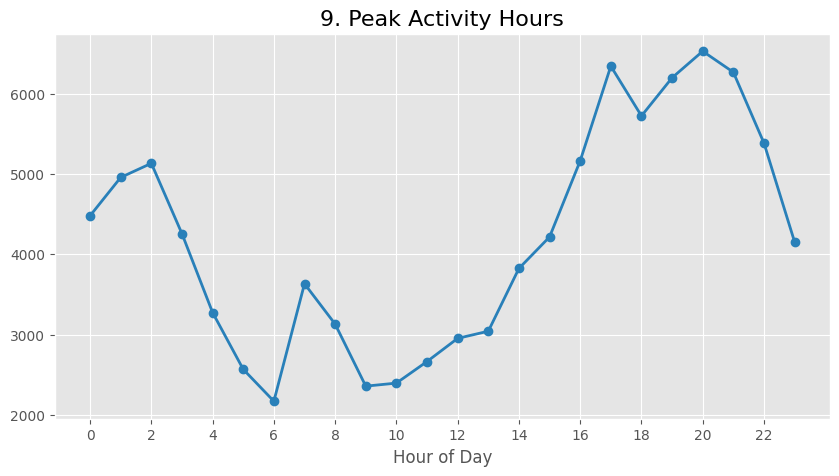

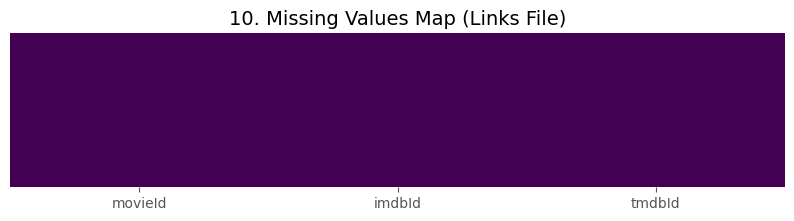

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_13772\3676241612.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')


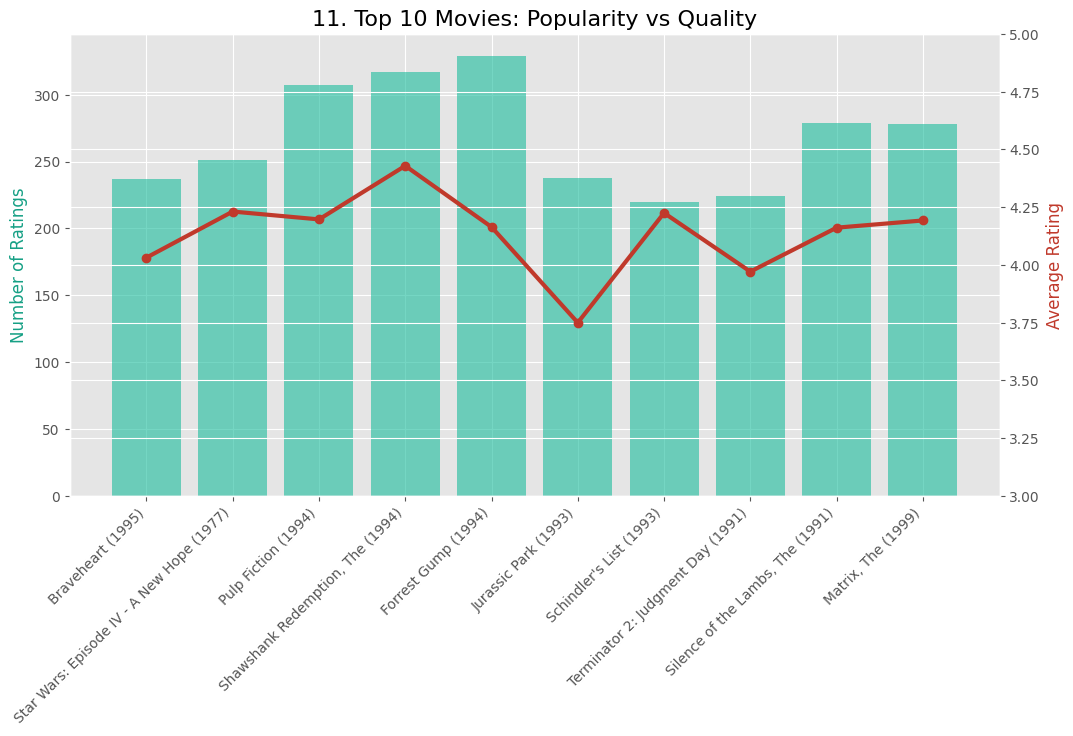

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global style for professional plots
plt.style.use('ggplot')
sns.set_palette("viridis")

# ==========================================
# 1. LOAD DATA
# ==========================================
# Using the specific variable names you requested
new_rating = pd.read_csv('cleaned_data/ratings.csv')
new_movie = pd.read_csv('cleaned_data/movies.csv')
new_movie_genre = pd.read_csv('cleaned_data/movie_genre.csv')
new_links = pd.read_csv('cleaned_data/links.csv')
new_tags = pd.read_csv('cleaned_data/tags.csv')

print("Data Loaded.")

# ==========================================
# 2. PREPROCESSING (The Crucial Fixes)
# ==========================================

# --- Fix A: Dates (Combine Date + Time) ---
# The new format splits them, so we combine for analysis
new_rating['datetime'] = pd.to_datetime(new_rating['date'] + ' ' + new_rating['time'])
new_tags['datetime'] = pd.to_datetime(new_tags['date'] + ' ' + new_tags['time'])

# --- Fix B: Genres (Merge Separate File) ---
# 1. Aggregate genres: "Action", "Sci-Fi" -> "Action|Sci-Fi"
# Note: movie_genre.csv uses 'movieid' (lowercase), we rename it to 'movieId' to match other files
genres_agg = new_movie_genre.groupby('movieid')['genre'].apply(lambda x: '|'.join(x)).reset_index()
genres_agg.columns = ['movieId', 'genres'] 

# 2. Merge into the main movie table
new_movie = new_movie.merge(genres_agg, on='movieId', how='left')
new_movie['genres'] = new_movie['genres'].fillna('(no genres listed)')

print("Preprocessing Complete: Dates combined, Genres merged.")

# ==========================================
# 3. GENERATE VISUALIZATIONS
# ==========================================

# --- 1. Rating Distribution ---
plt.figure(figsize=(10, 6))
counts = new_rating['rating'].value_counts().sort_index()
plt.bar(counts.index, counts.values, width=0.4, color='#3498db', edgecolor='black')
plt.title('1. Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- 2. Long Tail (Popularity Bias) ---
plt.figure(figsize=(10, 6))
pop_counts = new_rating.groupby('movieId').size().sort_values(ascending=False).values
plt.plot(range(len(pop_counts)), pop_counts, color='#e74c3c', linewidth=2)
plt.fill_between(range(len(pop_counts)), pop_counts, color='#e74c3c', alpha=0.3)
plt.title('2. Long Tail Distribution (Popularity)', fontsize=16)
plt.xlabel('Movies (Ranked)', fontsize=12)
plt.ylabel('Ratings (Log Scale)', fontsize=12)
plt.yscale('log') 
plt.show()

# --- 3. Top 10 Genres ---
plt.figure(figsize=(12, 8))
# Use new_movie_genre directly as it already has one row per genre
top_genres = new_movie_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('3. Top 10 Most Common Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.show()

# --- 4. User Activity ---
plt.figure(figsize=(10, 6))
user_activity = new_rating.groupby('userId').size()
plt.hist(user_activity, bins=50, color='#9b59b6', edgecolor='black')
plt.title('4. User Activity Distribution', fontsize=16)
plt.xlabel('Number of Ratings Given', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log')
plt.show()

# --- 5. The "Golden Age" Effect (Year vs Rating) ---
# Extract Year
new_movie['year'] = new_movie['title'].str.extract(r'\((\d{4})\)')
new_movie['year'] = pd.to_numeric(new_movie['year'], errors='coerce')

# Merge
merged_year = new_rating.merge(new_movie, on='movieId')
year_stats = merged_year.groupby('year').agg({'rating': ['mean', 'count']})
year_stats.columns = ['mean_rating', 'count']
year_stats = year_stats[year_stats['count'] > 50] # Filter noise

plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats['mean_rating'], color='#d35400', linewidth=2)
plt.title('5. The "Golden Age" Effect: Year vs Rating', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

# --- 6. Top Controversial Movies (High Variance) ---
movie_stats = new_rating.groupby('movieId').agg({'rating': ['std', 'count']})
movie_stats.columns = ['std', 'count']
# Filter: Must have > 50 ratings
top_controversial = movie_stats[movie_stats['count'] > 50].sort_values('std', ascending=False).head(10)
top_controversial = top_controversial.merge(new_movie[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 6))
sns.barplot(x='std', y='title', data=top_controversial, palette='magma')
plt.title('6. Top 10 Controversial Movies (High Variance)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=12)
plt.show()

# --- 7. User Likes vs Dislikes ---
new_rating['is_like'] = new_rating['rating'] >= 4.0
new_rating['is_dislike'] = new_rating['rating'] <= 2.5
user_patterns = new_rating.groupby('userId').agg({'is_like':'sum', 'is_dislike':'sum', 'rating':'count'}).reset_index()

plt.figure(figsize=(8, 8))
plt.scatter(user_patterns['is_like'], user_patterns['is_dislike'], 
            c=np.log1p(user_patterns['rating']), cmap='cool', alpha=0.7, edgecolors='k')
# Add diagonal line
max_v = max(user_patterns['is_like'].max(), user_patterns['is_dislike'].max())
plt.plot([0, max_v], [0, max_v], 'r--', label='Balanced')
plt.title('7. User Behavior: Likes vs Dislikes', fontsize=16)
plt.xlabel('Likes (>= 4.0)', fontsize=12)
plt.ylabel('Dislikes (<= 2.5)', fontsize=12)
plt.legend()
plt.show()

# --- 8. Genre Sentiment (Stacked Bar) ---
merged_g = new_rating.merge(new_movie_genre, left_on='movieId', right_on='movieid')
merged_g['sentiment'] = pd.cut(merged_g['rating'], bins=[0, 2.5, 3.5, 5], labels=['Dislike', 'Neutral', 'Like'])

g_sentiment = merged_g.groupby(['genre', 'sentiment'], observed=False).size().unstack(fill_value=0)
g_sentiment = g_sentiment[g_sentiment.sum(axis=1) > 500] # Filter small genres
g_pct = g_sentiment.div(g_sentiment.sum(axis=1), axis=0) * 100
g_pct = g_pct.sort_values('Like')

plt.figure(figsize=(12, 8))
g_pct.plot(kind='barh', stacked=True, color=['#e74c3c', '#95a5a6', '#2ecc71'], figsize=(12, 8))
plt.title('8. Genre Sentiment Analysis', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# --- 9. Peak Activity Hours ---
hourly_counts = new_rating.groupby(new_rating['datetime'].dt.hour).size()
plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#2980b9', linewidth=2)
plt.title('9. Peak Activity Hours', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

# --- 10. Missing Values (Links) ---
plt.figure(figsize=(10, 2))
sns.heatmap(new_links.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('10. Missing Values Map (Links File)', fontsize=14)
plt.show()

# --- 11. Popularity vs Quality ---
top_10_ids = new_rating.groupby('movieId').size().sort_values(ascending=False).head(10).index
top_10_data = new_rating[new_rating['movieId'].isin(top_10_ids)].groupby('movieId').agg({'rating':['mean', 'count']})
top_10_data.columns = ['mean', 'count']
top_10_data = top_10_data.merge(new_movie[['movieId', 'title']], on='movieId')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_10_data['title'], top_10_data['count'], color='#1abc9c', alpha=0.6, label='Popularity')
ax1.set_ylabel('Number of Ratings', color='#16a085')
ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(top_10_data['title'], top_10_data['mean'], color='#c0392b', marker='o', linewidth=3, label='Avg Rating')
ax2.set_ylabel('Average Rating', color='#c0392b')
ax2.set_ylim(3, 5)
plt.title('11. Top 10 Movies: Popularity vs Quality', fontsize=16)
plt.show()

In [4]:
# --- Fix A: Dates (Combine Date + Time) ---
# The new dataset has split date/time columns. We merge them for analysis.
new_rating['datetime'] = pd.to_datetime(new_rating['date'] + ' ' + new_rating['time'])
new_tags['datetime'] = pd.to_datetime(new_tags['date'] + ' ' + new_tags['time'])

# --- Fix B: Genres (Merge into Movies) ---
# The genres are now in 'movie_genre.csv'. We need to attach them to 'movies.csv'.
# 1. Aggregate genres per movie (e.g., "Action|Adventure")
genres_agg = new_movie_genre.groupby('movieid')['genre'].apply(lambda x: '|'.join(x)).reset_index()
genres_agg.columns = ['movieId', 'genres'] # Rename 'movieid' -> 'movieId' to match

# 2. Merge into the main movie dataframe
new_movie = new_movie.merge(genres_agg, on='movieId', how='left')
new_movie['genres'] = new_movie['genres'].fillna('(no genres listed)')

# Set Style
plt.style.use('ggplot')
sns.set_palette("viridis")

# ==========================================
# 2. EXPLORATORY DATA ANALYSIS (GRAPHS)
# ==========================================

# --- 1. Rating Distribution ---
plt.figure(figsize=(10, 6))
counts = new_rating['rating'].value_counts().sort_index()
plt.bar(counts.index, counts.values, width=0.4, color='#3498db', edgecolor='black')
plt.title('1. Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- 2. Long Tail (Popularity Bias) ---
plt.figure(figsize=(10, 6))
# Count ratings per movie
pop_counts = new_rating.groupby('movieId').size().sort_values(ascending=False).values
plt.plot(range(len(pop_counts)), pop_counts, color='#e74c3c', linewidth=2)
plt.fill_between(range(len(pop_counts)), pop_counts, color='#e74c3c', alpha=0.3)
plt.title('2. Long Tail Distribution (Movie Popularity)', fontsize=16)
plt.xlabel('Movies (Ranked)', fontsize=12)
plt.ylabel('Ratings (Log Scale)', fontsize=12)
plt.yscale('log') # Crucial for showing the tail
plt.show()

# --- 3. Top 10 Genres ---
plt.figure(figsize=(12, 8))
# We can use new_movie_genre directly as it's already "exploded" (one row per genre)
top_genres = new_movie_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('3. Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.show()

# --- 4. User Activity ---
plt.figure(figsize=(10, 6))
user_activity = new_rating.groupby('userId').size()
plt.hist(user_activity, bins=50, color='#9b59b6', edgecolor='black')
plt.title('4. User Activity (How many ratings do users give?)', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log')
plt.show()

# --- 5. The "Golden Age" Effect (Year vs Rating) ---
# Extract Year from Title string
new_movie['year'] = new_movie['title'].str.extract(r'\((\d{4})\)')
new_movie['year'] = pd.to_numeric(new_movie['year'], errors='coerce')

# Merge and calculate stats
merged_year = new_rating.merge(new_movie, on='movieId')
year_stats = merged_year.groupby('year').agg({'rating': ['mean', 'count']})
year_stats.columns = ['mean_rating', 'count']
year_stats = year_stats[year_stats['count'] > 50] # Filter noise

plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats['mean_rating'], color='#d35400', linewidth=2)
plt.title('5. The "Golden Age" Effect: Year vs Rating', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

# --- 6. Top Controversial Movies (High Variance) ---
movie_stats = new_rating.groupby('movieId').agg({'rating': ['std', 'count']})
movie_stats.columns = ['std', 'count']
# Filter: Must have > 50 ratings
top_controversial = movie_stats[movie_stats['count'] > 50].sort_values('std', ascending=False).head(10)
top_controversial = top_controversial.merge(new_movie[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 6))
sns.barplot(x='std', y='title', data=top_controversial, palette='magma')
plt.title('6. Top 10 Controversial Movies (Highest Variance)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=12)
plt.show()

# --- 7. User Likes vs Dislikes ---
# Define Like/Dislike
new_rating['is_like'] = new_rating['rating'] >= 4.0
new_rating['is_dislike'] = new_rating['rating'] <= 2.5
user_patterns = new_rating.groupby('userId').agg({'is_like':'sum', 'is_dislike':'sum', 'rating':'count'}).reset_index()

plt.figure(figsize=(8, 8))
plt.scatter(user_patterns['is_like'], user_patterns['is_dislike'], 
            c=np.log1p(user_patterns['rating']), cmap='cool', alpha=0.7, edgecolors='k')
# Add diagonal line
max_v = max(user_patterns['is_like'].max(), user_patterns['is_dislike'].max())
plt.plot([0, max_v], [0, max_v], 'r--', label='Balanced')
plt.title('7. User Behavior: Likes vs Dislikes', fontsize=16)
plt.xlabel('Likes (>= 4.0)', fontsize=12)
plt.ylabel('Dislikes (<= 2.5)', fontsize=12)
plt.legend()
plt.show()

# --- 8. Genre Sentiment (Stacked Bar) ---
merged_g = new_rating.merge(new_movie_genre, left_on='movieId', right_on='movieid')
merged_g['sentiment'] = pd.cut(merged_g['rating'], bins=[0, 2.5, 3.5, 5], labels=['Dislike', 'Neutral', 'Like'])

g_sentiment = merged_g.groupby(['genre', 'sentiment'], observed=False).size().unstack(fill_value=0)
g_sentiment = g_sentiment[g_sentiment.sum(axis=1) > 500] # Filter small genres
g_pct = g_sentiment.div(g_sentiment.sum(axis=1), axis=0) * 100
g_pct = g_pct.sort_values('Like')

plt.figure(figsize=(12, 8))
g_pct.plot(kind='barh', stacked=True, color=['#e74c3c', '#95a5a6', '#2ecc71'], figsize=(12, 8))
plt.title('8. Genre Sentiment Analysis', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# --- 9. Peak Activity Hours ---
hourly_counts = new_rating.groupby(new_rating['datetime'].dt.hour).size()
plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#2980b9', linewidth=2)
plt.title('9. Peak Activity Hours', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

# --- 10. Missing Values (Links) ---
plt.figure(figsize=(10, 2))
sns.heatmap(new_links.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('10. Missing Values Map (Links File)', fontsize=14)
plt.show()

# --- 11. Popularity vs Quality (Top 10 Movies) ---
top_10_ids = new_rating.groupby('movieId').size().sort_values(ascending=False).head(10).index
top_10_data = new_rating[new_rating['movieId'].isin(top_10_ids)].groupby('movieId').agg({'rating':['mean', 'count']})
top_10_data.columns = ['mean', 'count']
top_10_data = top_10_data.merge(new_movie[['movieId', 'title']], on='movieId')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_10_data['title'], top_10_data['count'], color='#1abc9c', alpha=0.6, label='Popularity')
ax1.set_ylabel('Number of Ratings', color='#16a085')
ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(top_10_data['title'], top_10_data['mean'], color='#c0392b', marker='o', linewidth=3, label='Avg Rating')
ax2.set_ylabel('Average Rating', color='#c0392b')
ax2.set_ylim(3, 5)
plt.title('11. Top 10 Movies: Popularity vs Quality', fontsize=16)
plt.show()

KeyError: 'genres'

Data Loaded.
Preprocessing Complete: Dates combined, Genres merged.


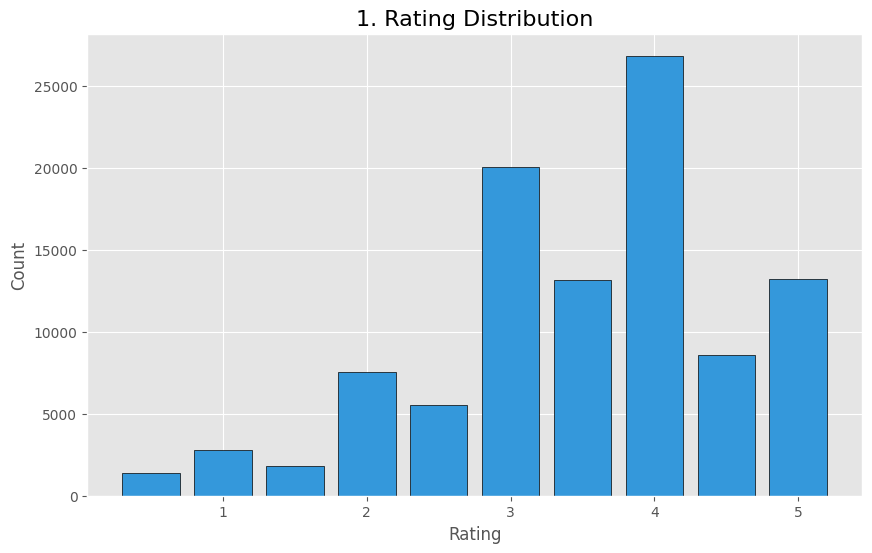

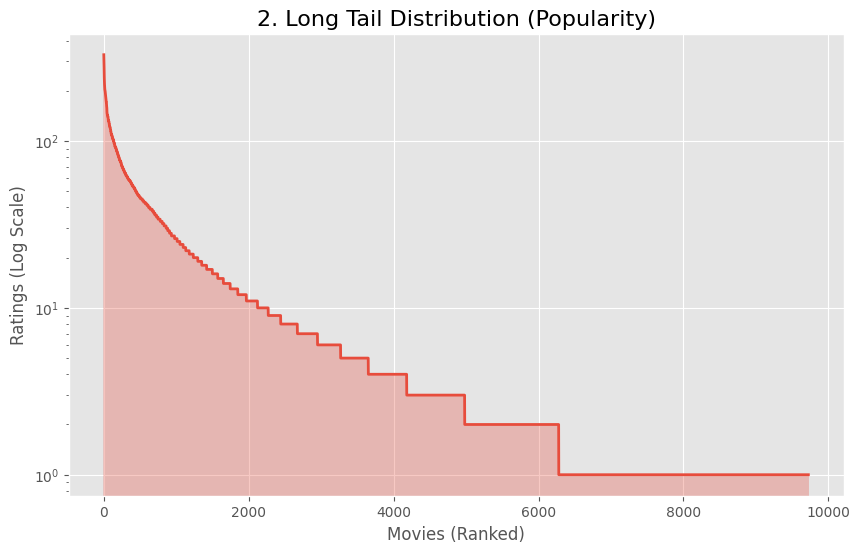

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3676241612.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


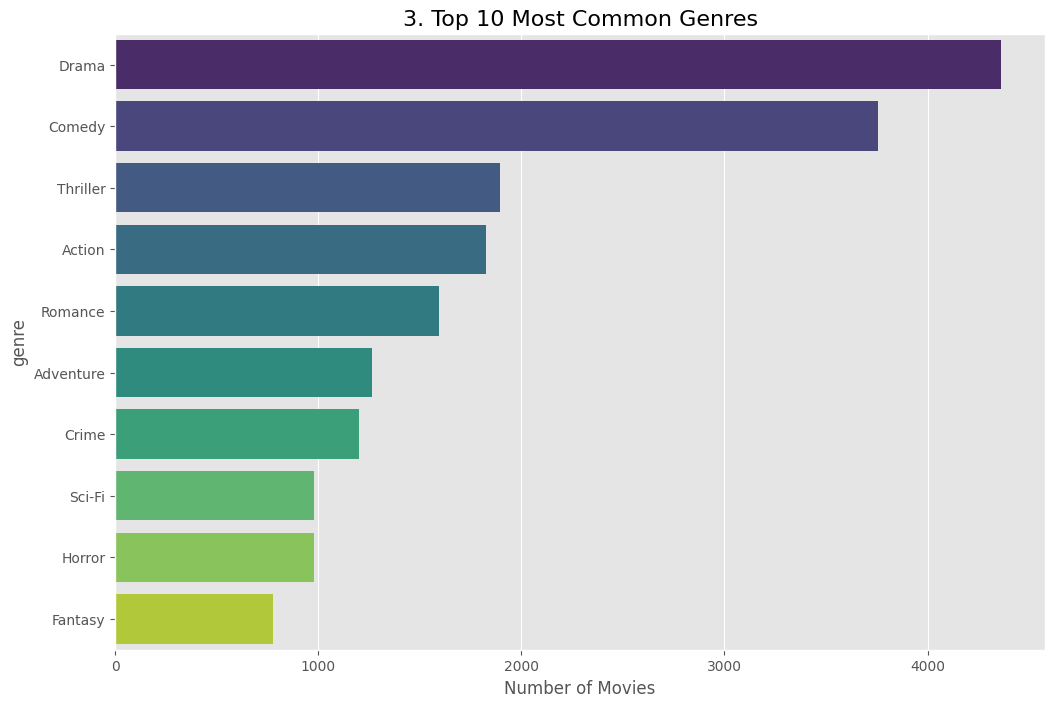

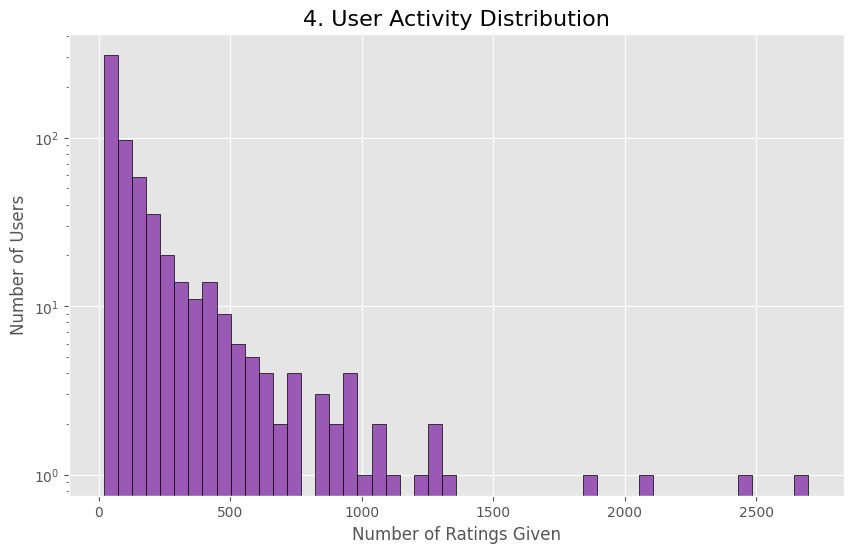

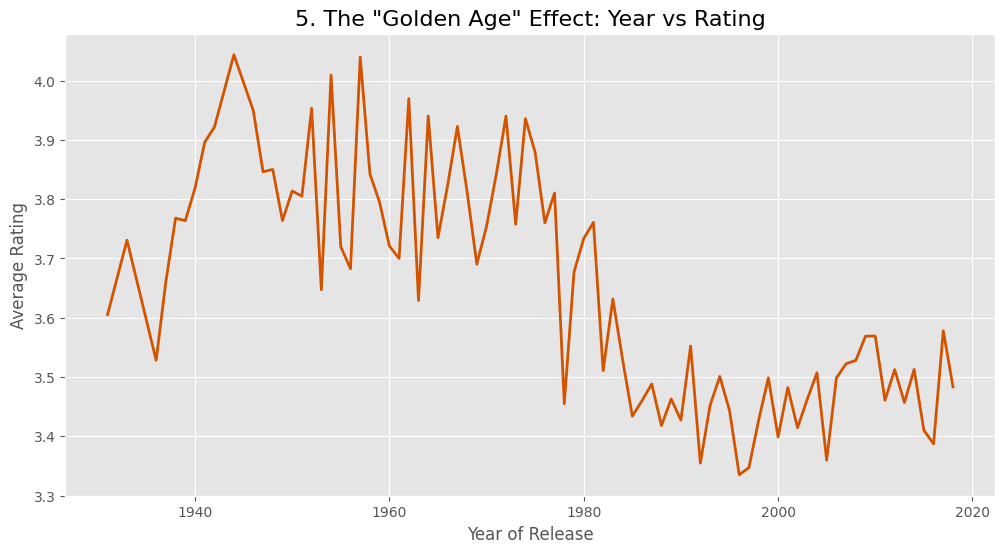

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3676241612.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='std', y='title', data=top_controversial, palette='magma')


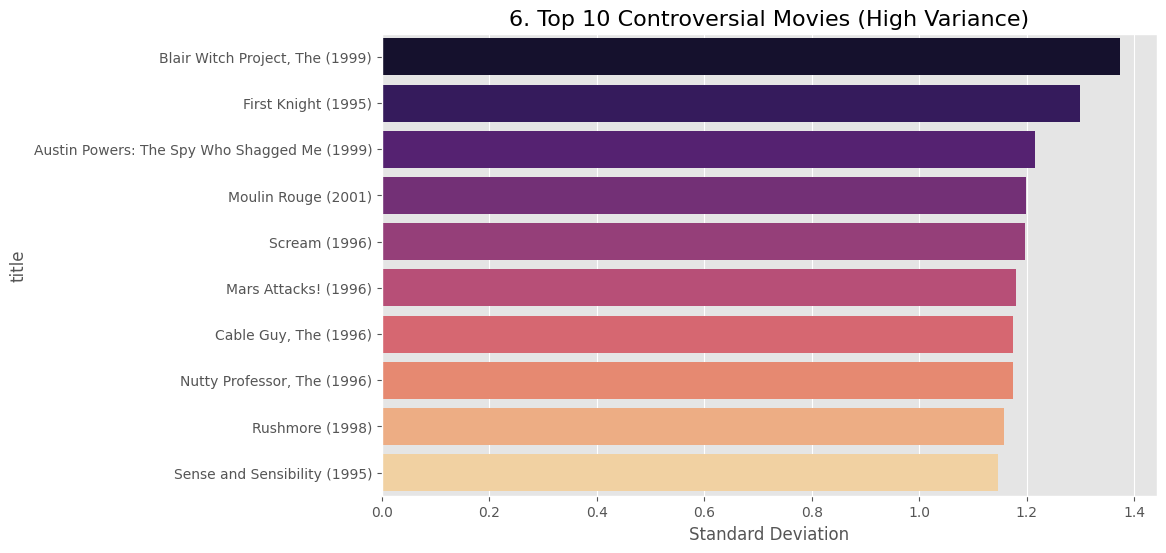

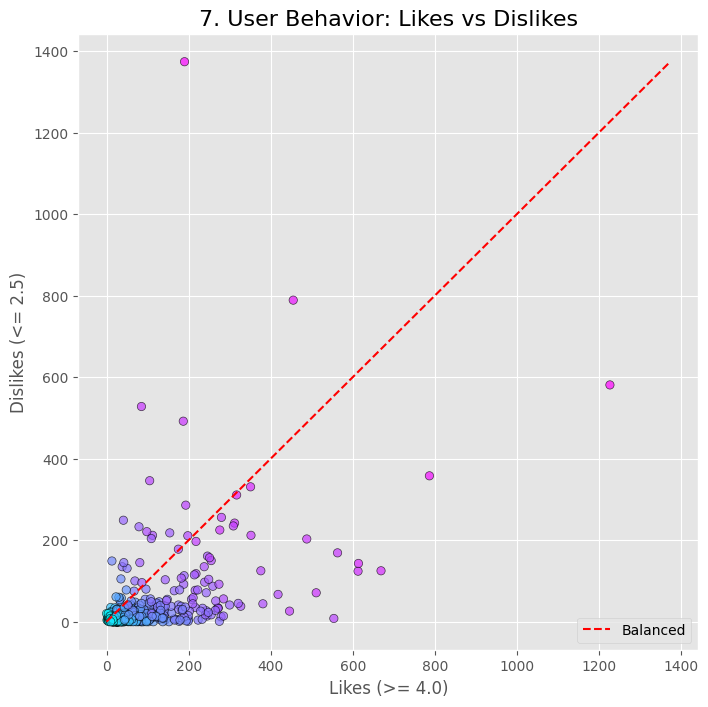

<Figure size 1200x800 with 0 Axes>

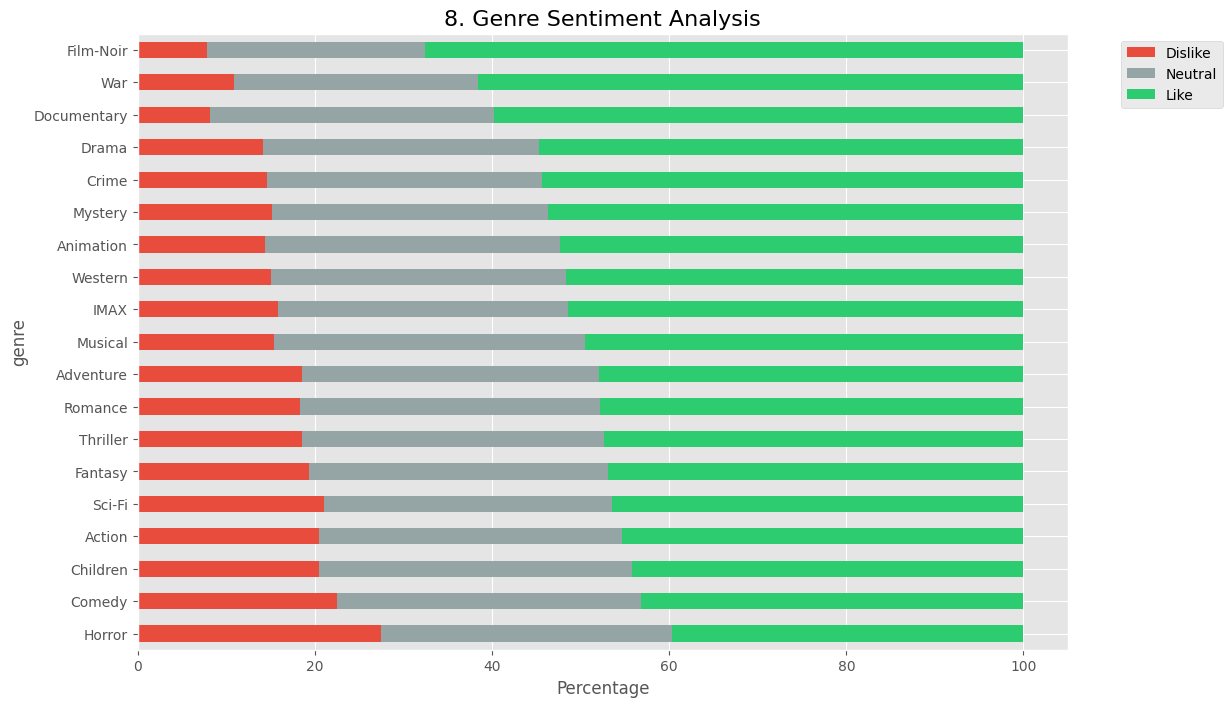

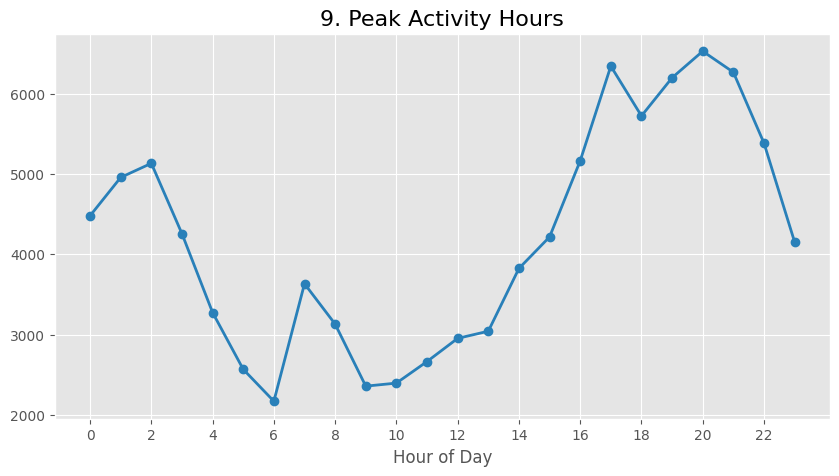

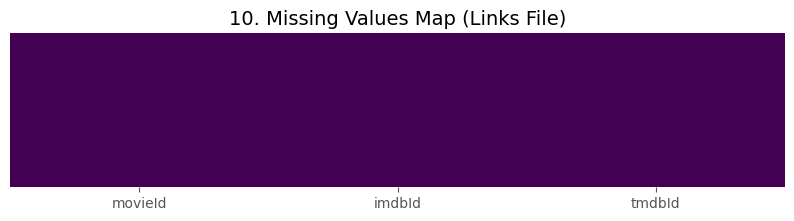

C:\Users\Tejas Naik\AppData\Local\Temp\ipykernel_23100\3676241612.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')


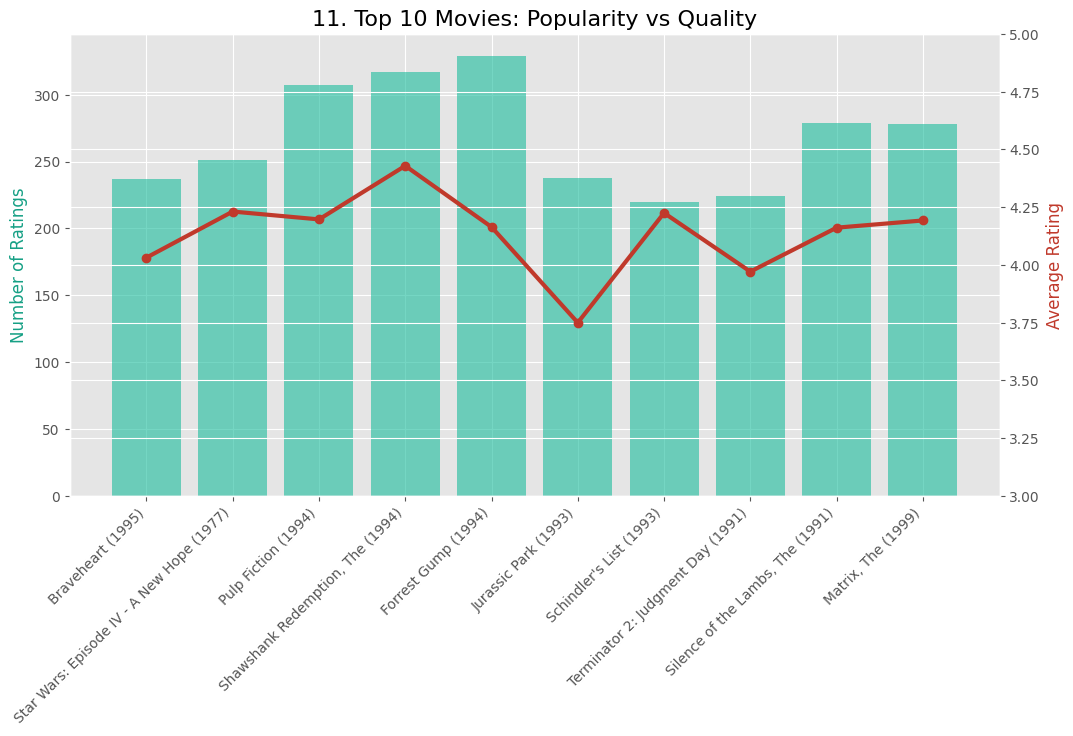

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global style for professional plots
plt.style.use('ggplot')
sns.set_palette("viridis")

# ==========================================
# 1. LOAD DATA
# ==========================================
# Using the specific variable names you requested
new_rating = pd.read_csv('cleaned_data/ratings.csv')
new_movie = pd.read_csv('cleaned_data/movies.csv')
new_movie_genre = pd.read_csv('cleaned_data/movie_genre.csv')
new_links = pd.read_csv('cleaned_data/links.csv')
new_tags = pd.read_csv('cleaned_data/tags.csv')

print("Data Loaded.")

# ==========================================
# 2. PREPROCESSING (The Crucial Fixes)
# ==========================================

# --- Fix A: Dates (Combine Date + Time) ---
# The new format splits them, so we combine for analysis
new_rating['datetime'] = pd.to_datetime(new_rating['date'] + ' ' + new_rating['time'])
new_tags['datetime'] = pd.to_datetime(new_tags['date'] + ' ' + new_tags['time'])

# --- Fix B: Genres (Merge Separate File) ---
# 1. Aggregate genres: "Action", "Sci-Fi" -> "Action|Sci-Fi"
# Note: movie_genre.csv uses 'movieid' (lowercase), we rename it to 'movieId' to match other files
genres_agg = new_movie_genre.groupby('movieid')['genre'].apply(lambda x: '|'.join(x)).reset_index()
genres_agg.columns = ['movieId', 'genres'] 

# 2. Merge into the main movie table
new_movie = new_movie.merge(genres_agg, on='movieId', how='left')
new_movie['genres'] = new_movie['genres'].fillna('(no genres listed)')

print("Preprocessing Complete: Dates combined, Genres merged.")

# ==========================================
# 3. GENERATE VISUALIZATIONS
# ==========================================

# --- 1. Rating Distribution ---
plt.figure(figsize=(10, 6))
counts = new_rating['rating'].value_counts().sort_index()
plt.bar(counts.index, counts.values, width=0.4, color='#3498db', edgecolor='black')
plt.title('1. Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- 2. Long Tail (Popularity Bias) ---
plt.figure(figsize=(10, 6))
pop_counts = new_rating.groupby('movieId').size().sort_values(ascending=False).values
plt.plot(range(len(pop_counts)), pop_counts, color='#e74c3c', linewidth=2)
plt.fill_between(range(len(pop_counts)), pop_counts, color='#e74c3c', alpha=0.3)
plt.title('2. Long Tail Distribution (Popularity)', fontsize=16)
plt.xlabel('Movies (Ranked)', fontsize=12)
plt.ylabel('Ratings (Log Scale)', fontsize=12)
plt.yscale('log') 
plt.show()

# --- 3. Top 10 Genres ---
plt.figure(figsize=(12, 8))
# Use new_movie_genre directly as it already has one row per genre
top_genres = new_movie_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('3. Top 10 Most Common Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.show()

# --- 4. User Activity ---
plt.figure(figsize=(10, 6))
user_activity = new_rating.groupby('userId').size()
plt.hist(user_activity, bins=50, color='#9b59b6', edgecolor='black')
plt.title('4. User Activity Distribution', fontsize=16)
plt.xlabel('Number of Ratings Given', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log')
plt.show()

# --- 5. The "Golden Age" Effect (Year vs Rating) ---
# Extract Year
new_movie['year'] = new_movie['title'].str.extract(r'\((\d{4})\)')
new_movie['year'] = pd.to_numeric(new_movie['year'], errors='coerce')

# Merge
merged_year = new_rating.merge(new_movie, on='movieId')
year_stats = merged_year.groupby('year').agg({'rating': ['mean', 'count']})
year_stats.columns = ['mean_rating', 'count']
year_stats = year_stats[year_stats['count'] > 50] # Filter noise

plt.figure(figsize=(12, 6))
plt.plot(year_stats.index, year_stats['mean_rating'], color='#d35400', linewidth=2)
plt.title('5. The "Golden Age" Effect: Year vs Rating', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

# --- 6. Top Controversial Movies (High Variance) ---
movie_stats = new_rating.groupby('movieId').agg({'rating': ['std', 'count']})
movie_stats.columns = ['std', 'count']
# Filter: Must have > 50 ratings
top_controversial = movie_stats[movie_stats['count'] > 50].sort_values('std', ascending=False).head(10)
top_controversial = top_controversial.merge(new_movie[['movieId', 'title']], on='movieId')

plt.figure(figsize=(10, 6))
sns.barplot(x='std', y='title', data=top_controversial, palette='magma')
plt.title('6. Top 10 Controversial Movies (High Variance)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=12)
plt.show()

# --- 7. User Likes vs Dislikes ---
new_rating['is_like'] = new_rating['rating'] >= 4.0
new_rating['is_dislike'] = new_rating['rating'] <= 2.5
user_patterns = new_rating.groupby('userId').agg({'is_like':'sum', 'is_dislike':'sum', 'rating':'count'}).reset_index()

plt.figure(figsize=(8, 8))
plt.scatter(user_patterns['is_like'], user_patterns['is_dislike'], 
            c=np.log1p(user_patterns['rating']), cmap='cool', alpha=0.7, edgecolors='k')
# Add diagonal line
max_v = max(user_patterns['is_like'].max(), user_patterns['is_dislike'].max())
plt.plot([0, max_v], [0, max_v], 'r--', label='Balanced')
plt.title('7. User Behavior: Likes vs Dislikes', fontsize=16)
plt.xlabel('Likes (>= 4.0)', fontsize=12)
plt.ylabel('Dislikes (<= 2.5)', fontsize=12)
plt.legend()
plt.show()

# --- 8. Genre Sentiment (Stacked Bar) ---
merged_g = new_rating.merge(new_movie_genre, left_on='movieId', right_on='movieid')
merged_g['sentiment'] = pd.cut(merged_g['rating'], bins=[0, 2.5, 3.5, 5], labels=['Dislike', 'Neutral', 'Like'])

g_sentiment = merged_g.groupby(['genre', 'sentiment'], observed=False).size().unstack(fill_value=0)
g_sentiment = g_sentiment[g_sentiment.sum(axis=1) > 500] # Filter small genres
g_pct = g_sentiment.div(g_sentiment.sum(axis=1), axis=0) * 100
g_pct = g_pct.sort_values('Like')

plt.figure(figsize=(12, 8))
g_pct.plot(kind='barh', stacked=True, color=['#e74c3c', '#95a5a6', '#2ecc71'], figsize=(12, 8))
plt.title('8. Genre Sentiment Analysis', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# --- 9. Peak Activity Hours ---
hourly_counts = new_rating.groupby(new_rating['datetime'].dt.hour).size()
plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='#2980b9', linewidth=2)
plt.title('9. Peak Activity Hours', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

# --- 10. Missing Values (Links) ---
plt.figure(figsize=(10, 2))
sns.heatmap(new_links.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('10. Missing Values Map (Links File)', fontsize=14)
plt.show()

# --- 11. Popularity vs Quality ---
top_10_ids = new_rating.groupby('movieId').size().sort_values(ascending=False).head(10).index
top_10_data = new_rating[new_rating['movieId'].isin(top_10_ids)].groupby('movieId').agg({'rating':['mean', 'count']})
top_10_data.columns = ['mean', 'count']
top_10_data = top_10_data.merge(new_movie[['movieId', 'title']], on='movieId')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_10_data['title'], top_10_data['count'], color='#1abc9c', alpha=0.6, label='Popularity')
ax1.set_ylabel('Number of Ratings', color='#16a085')
ax1.set_xticklabels(top_10_data['title'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(top_10_data['title'], top_10_data['mean'], color='#c0392b', marker='o', linewidth=3, label='Avg Rating')
ax2.set_ylabel('Average Rating', color='#c0392b')
ax2.set_ylim(3, 5)
plt.title('11. Top 10 Movies: Popularity vs Quality', fontsize=16)
plt.show()